# <center>Cancer Diagnosis Analytics Dashboard</center>

# 1. Data Acquisition And Overview #

## Introduction To Project

This project analyzes breast cancer data to help improve diagnosis and treatment planning. Using a UK-based dataset of 2,000+ patients (METABRIC), we explore patterns in cancer outcomes and build tools to predict patient risks. The goal is to create an interactive dashboard that helps healthcare professionals make data-driven decisions.

## Dataset Overview

The METABRIC (Molecular Taxonomy of Breast Cancer International Consortium) dataset contains genomic and clinical information for breast cancer patients. The dataset includes:

- RNA expression data for various genes
- Mutation information
- Patient clinical data
- Treatment and outcome information

## Objectives

1. **Explore Patient Data**: Analyze cancer gene expression patterns and molecular characteristics
2. **Predict Outcomes**: Build models to forecast survival risks and treatment success
3. **Optimize Care**: Identify factors that improve diagnosis speed and resource use
4. **Create Dashboard**: Develop an interactive tool for visualizing key insights

## Hypotheses

1. **Molecular Subtype Hypothesis**: Breast cancer molecular subtypes will show significant differences in 5-year survival rates. We expect Luminal A patients to have >85% survival rate compared to <60% for Basal-like subtypes.

2. **Age and Treatment Response Hypothesis**: Patients diagnosed under 45 years old will show different treatment response patterns compared to those over 70. Younger patients will have more aggressive tumors but better response to chemotherapy.

3. **Genomic Marker Prediction Hypothesis**: A combination of 3-5 key genetic markers will predict treatment outcomes with >75% accuracy.

4. **Tumor Characteristics and Survival Hypothesis**: Tumor size and lymph node involvement will be stronger predictors of survival than patient age.

5. **Treatment Optimization Hypothesis**: Machine learning models can identify optimal treatment protocols for specific patient subgroups.

## Imports And Settings


### Import Required Libraries

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from datetime import datetime

# Create directory for saving visualizations
os.makedirs('../static/images', exist_ok=True)
print("Created directory: ../static/images")

# Configure visualization settings
plt.style.use('seaborn-v0_8-whitegrid')  # Use seaborn style for plots
sns.set_theme(style="whitegrid", font_scale=1.2)  # Increase font size for better readability
plt.rcParams['figure.figsize'] = (12, 8)  # Set default figure size
plt.rcParams['axes.labelsize'] = 12  # Set axis label size

Created directory: ../static/images


In [4]:
import sys
print(sys.executable)

c:\Users\User\Documents\CODE INSTITUTE\Final Project\Cancer-Diagnosis-Analytics-Dashboard\venv\Scripts\python.exe


### Display Settings For Pandas

In [5]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 50)       # Show more rows
pd.set_option('display.width', 1000)        # Wider display
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats

### Record Execution Time For Performance Tracking

In [6]:
start_time = datetime.now()
print(f"Notebook execution started at: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

Notebook execution started at: 2025-03-16 11:14:09


## Data Loading and Initial Examination

In [7]:
# Define file path and load dataset
data_path = '../data/raw/METABRIC_RNA_Mutation.csv'

# Check if file exists before loading
if os.path.exists(data_path):
    print(f"Loading dataset from: {data_path}")
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully. Shape: {df.shape}")
else:
    print(f"ERROR: File not found at {data_path}")
    print("Please ensure the METABRIC_RNA_Mutation.csv file is in the data/raw directory")
    # Create a small sample dataset for demonstration if file is missing
    df = pd.DataFrame({'sample_id': range(5), 'gene1': np.random.randn(5)})
    print("Created sample dataset for demonstration purposes")

# Display the first few rows of the dataset
print("\n--- First 5 rows of the dataset ---")
display(df.head())

Loading dataset from: ../data/raw/METABRIC_RNA_Mutation.csv


C:\Users\User\AppData\Local\Temp\ipykernel_8704\1256761933.py:7: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Dataset loaded successfully. Shape: (1904, 693)

--- First 5 rows of the dataset ---


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,map2k4_mut,ros1_mut,lamb3_mut,arid1b_mut,erbb2_mut,sf3b1_mut,sha


## Basic Dataset Information

In [8]:
# Display basic information about the dataset
print("\n--- Dataset Information ---")
df.info()

# Get summary statistics for numerical columns
print("\n--- Summary Statistics ---")
display(df.describe())

# Check the shape of the dataset
rows, cols = df.shape
print(f"\nDataset dimensions: {rows} rows × {cols} columns")

# Check column names and types
print("\n--- Column Data Types ---")
column_types = df.dtypes.value_counts()
print(f"Number of columns by data type:\n{column_types}")

# Identify potential ID columns
id_columns = [col for col in df.columns if 'id' in col.lower()]
print(f"\nPotential ID columns: {id_columns}")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates} ({duplicates/len(df):.2%} of data)")


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB

--- Summary Statistics ---


,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,jak2,stat1,stat2,stat3,stat5a,stat5b,mdm2,tp53bp1,adam10,adam17,aph1a,aph1b,arrdc1,cir1,ctbp1,ctbp2,cul1,dll1,dll3,dll4,dtx1,dtx2,dtx3,dtx4,ep300,fbxw7,hdac1,hdac2,hes1,hes5,heyl,itch,jag1,jag2,kdm5a,lfng,maml1,maml2,maml3,ncor2,ncstn,notch1,notch2,notch3,nrarp,numb,numbl,psen1,psen2,psenen,rbpj,rbpjl,rfng,snw1,spen,hes2,hes4,hes7,hey1,hey2,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,bad,bcl2,bcl2l1,bmp10,bmp15,bmp2,bmp3,bmp4,bmp5,bmp6,bmp7,bmpr1a,bmpr1b,bmpr2,braf,casp10,casp3,casp6,casp7,casp8,casp9,chek1,csf1,csf1r,cxcl8,cxcr1,cxcr2,dab2,diras3,dlec1,dph1,egfr,eif4e,eif4ebp1,eif5a2,erbb2,erbb3,erbb4,fas,fgf1,fgfr1,folr1,folr2,folr3,foxo1,foxo3,gdf11,gdf2,gsk3b,hif1a,hla-g,hras,igf1,igf1r,inha,inhba,inhbc,itgav,itgb3,izumo1r,kdr,kit,kras,map2k1,map2k2,map2k3,map2k4,map2k5,map3k1,map3k3,map3k4,map3k5,mapk1,mapk12,mapk14,mapk3,mapk4,mapk6,mapk7,mapk8,mapk9,mdc1,mlst8,mmp1,mmp10,mmp11,mmp12,mmp13,mmp14,mmp15,mmp16,mmp17,mmp19,mmp2,mmp21,mmp23b,mmp24,mmp25,mmp26,mmp27,mmp28,mmp3,mmp7,mmp9,mtor,nfkb1,nfkb2,opcml,pdgfa,pdgfb,pdgfra,pdgfrb,pdpk1,peg3,pik3ca,pik3r1,pik3r2,plagl1,ptk2,rab25,rad51,raf1,rassf1,rheb,rictor,rps6,rps6ka1,rps6ka2,rps6kb1,rps6kb2,rptor,slc19a1,smad1,smad2,smad3,smad4,smad5,smad6,smad7,smad9,sptbn1,terc,tert,tgfb1,tgfb2,tgfb3,tgfbr1,tgfbr2,tgfbr3,tsc1,tsc2,vegfa,vegfb,wfdc2,wwox,zfyve9,arid1a,arid1b,cbfb,gata3,kmt2c,kmt2d,myh9,ncor1,pde4dip,ptprd,ros1,runx1,tbx3,abcb1,abcb11,abcc1,abcc10,bbc3,bmf,cyp2c8,cyp3a4,fgf2,fn1,map2,map4,mapt,nr1i2,slco1b3,tubb1,tubb4a,tubb4b,twist1,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,bap1,bcas3,birc6,cacna2d3,ccnd3,chd1,clk3,clrn2,col12a1,col22a1,col6a3,ctcf,ctnna1,ctnna3,dnah11,dnah2,dnah5,dtwd2,fam20c,fanca,fancd2,flt3,foxp1,frmd3,gh1,gldc,gpr32,gps2,hdac9,herc2,hist1h2bc,kdm3a,kdm6a,klrg1,l1cam,lama2,lamb3,large1,ldlrap1,lifr,lipi,magea8,map3k10,map3k13,men1,mtap,muc16,myo1a,myo3a,ncoa3,nek1,nf2,npnt,nr2f1,nr3c1,nras,nrg3,nt5e,or6a2,palld,pbrm1,ppp2cb,ppp2r2a,prkacg,prkce,prkcq,prkcz,prkg1,prps2,prr16,ptpn22,ptprm,rasgef1b,rpgr,ryr2,sbno1,setd1a,setd2,setdb1,sf3b1,sgcd,shank2,siah1,sik1,sik2,smarcb1,smarcc1,smarcc2,smarcd1,spaca1,stab2,stmn2,syne1,taf1,taf4b,tbl1xr1,tg,thada,thsd7a,ttyh1,ubr5,ush2a,usp9x,utrn,zfp36l1,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,bche,cdk8,cdkn2c,cyb5a,cyp11a1,cyp11b2,cyp17a1,cyp19a1,cyp21a2,cyp3a43,cyp3a5,cyp3a7,ddc,hes6,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.00,1904.00,1904.00,1904.00,1832.00,1904.00,1904.00,1859.00,1904.00,1904.00,1904.00,1904.00,1884.00,1403.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.00,1904.0


Dataset dimensions: 1904 rows × 693 columns

--- Column Data Types ---
Number of columns by data type:
float64    498
object     190
int64        5
Name: count, dtype: int64

Potential ID columns: ['patient_id', 'arid1a', 'arid1b', 'arid2', 'arid5b', 'arid1a_mut', 'arid1b_mut', 'arid2_mut', 'arid5b_mut']

Number of duplicate rows: 0 (0.00% of data)


## Missing Value Analysis


--- Missing Value Analysis ---
Found 13 columns with missing values:


,Missing Values,Percentage
tumor_stage,501,26.31
3-gene_classifier_subtype,204,10.71
primary_tumor_laterality,106,5.57
neoplasm_histologic_grade,72,3.78
cellularity,54,2.84
mutation_count,45,2.36
er_status_measured_by_ihc,30,1.58
type_of_breast_surgery,22,1.16
tumor_size,20,1.05
cancer_type_detailed,15,0.79


Successfully saved: missing_values_heatmap.png


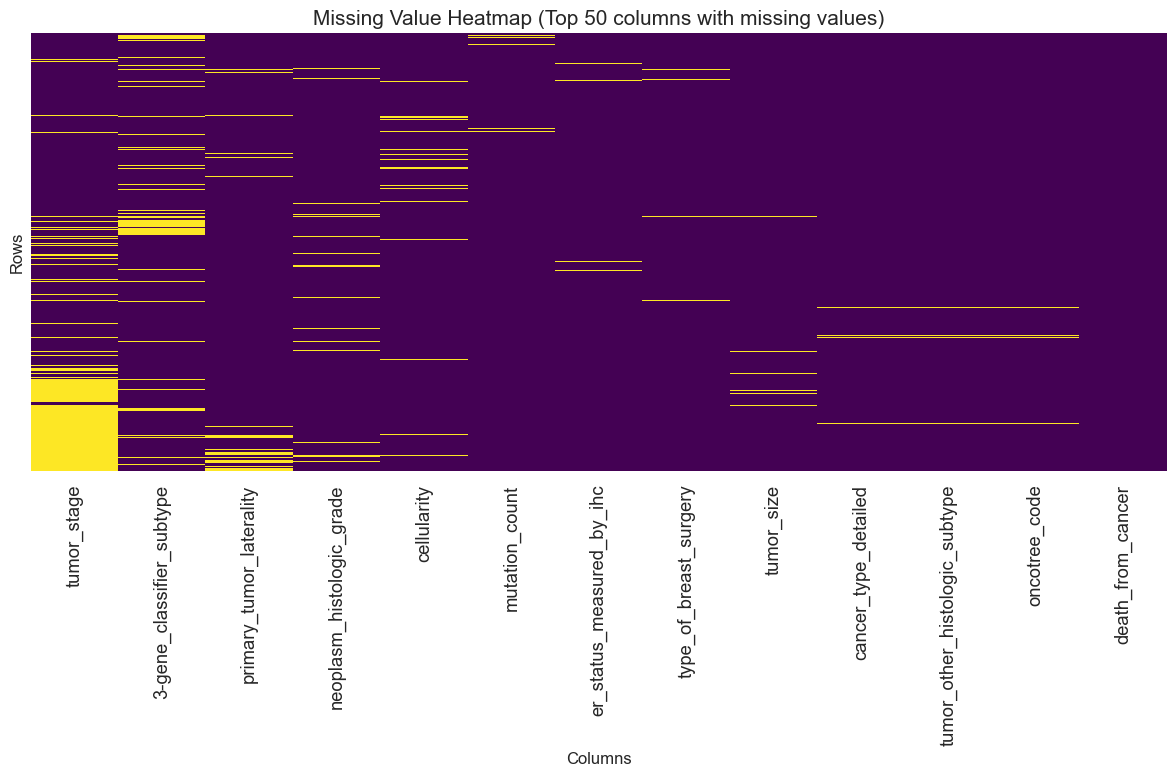

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a missing values summary dataframe
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display columns with missing values (if any)
missing_cols = missing_df[missing_df['Missing Values'] > 0].sort_values('Percentage', ascending=False)

print("\n--- Missing Value Analysis ---")
if len(missing_cols) > 0:
    print(f"Found {len(missing_cols)} columns with missing values:")
    display(missing_cols)
else:
    print("No missing values found in the dataset.")

# Visualize missing values if any exist
if len(missing_cols) > 0:
    plt.figure(figsize=(12, 8))
    plt.title('Missing Value Heatmap (Top 50 columns with missing values)', fontsize=15)
    
    # If there are many columns, only plot the top 50 with missing values
    cols_to_plot = missing_cols.index[:50] if len(missing_cols) > 50 else missing_cols.index
    
    # Create the heatmap
    sns.heatmap(df[cols_to_plot].isnull(), 
                cbar=False, 
                yticklabels=False,
                cmap='viridis')
    
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Rows', fontsize=12)
    plt.tight_layout()
    
    # Create directory and save with error handling
    try:
        import os
        os.makedirs('../static/images', exist_ok=True)
        plt.savefig('../static/images/missing_values_heatmap.png')
        print("Successfully saved: missing_values_heatmap.png")
    except Exception as e:
        print(f"Error saving figure: {e}")
    
    plt.show()

## Data Distribution Overview


--- Distribution of Sample Numeric Features (10 of 503) ---
Successfully saved: numeric_distributions.png


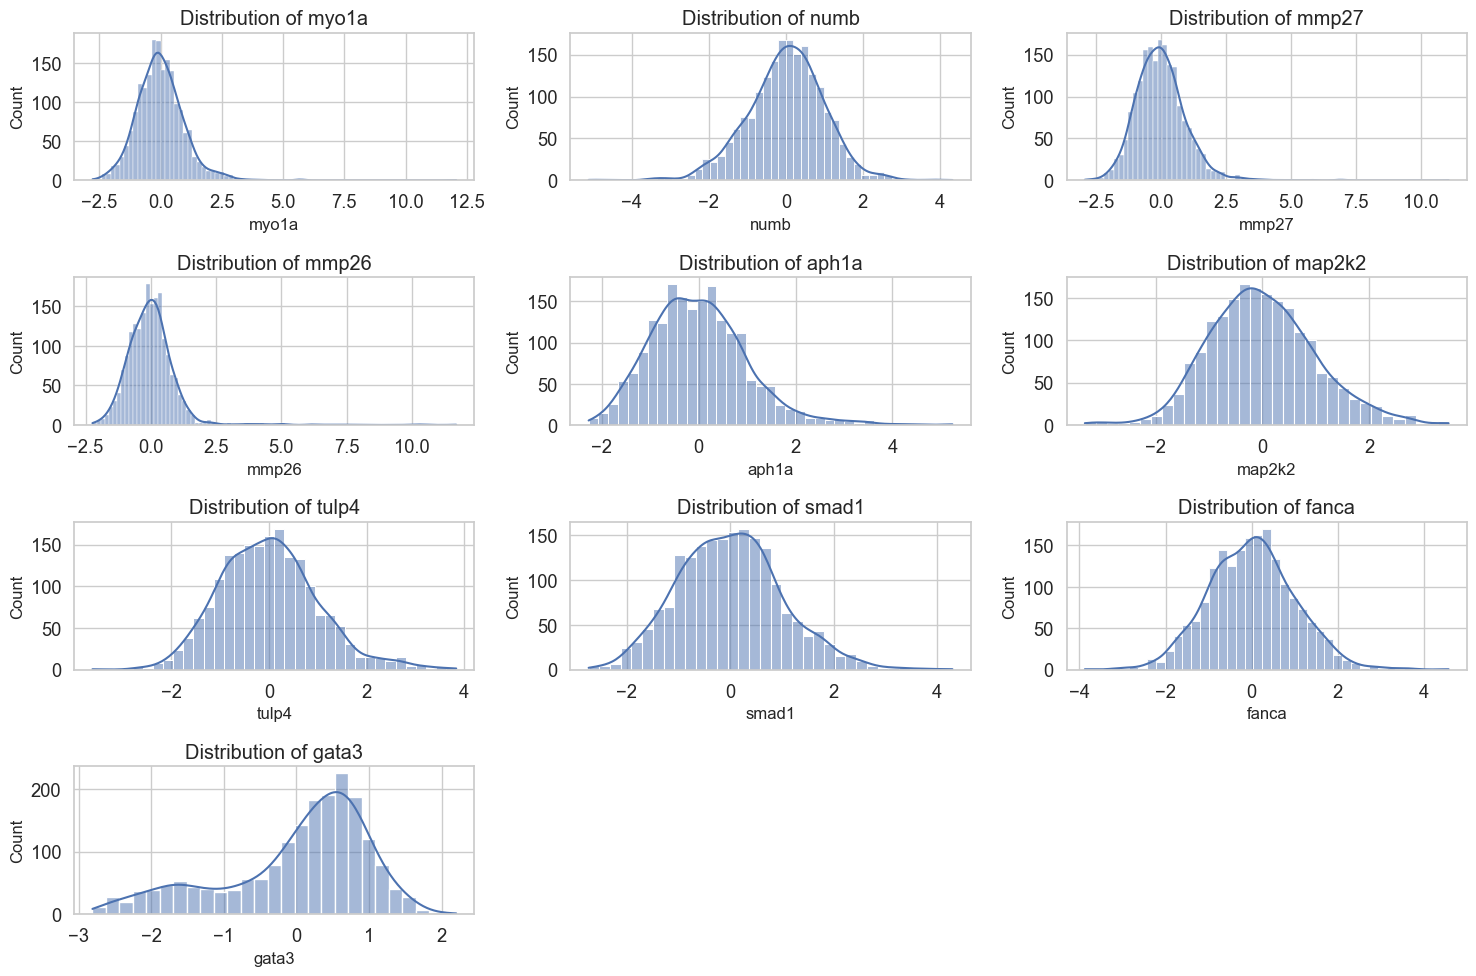


--- Categorical Column Analysis (190 columns) ---

Unique values in 'type_of_breast_surgery':


,Count,Percentage
type_of_breast_surgery,,
MASTECTOMY,1127,59.19
BREAST CONSERVING,755,39.65


Successfully saved: categorical_type_of_breast_surgery.png


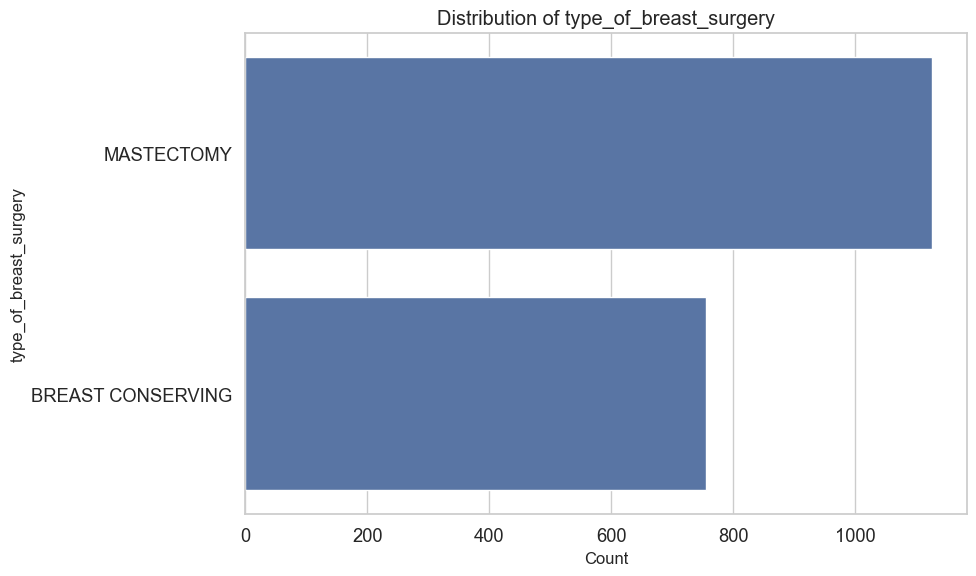


Unique values in 'cancer_type':


,Count,Percentage
cancer_type,,
Breast Cancer,1903,99.95
Breast Sarcoma,1,0.05


Successfully saved: categorical_cancer_type.png


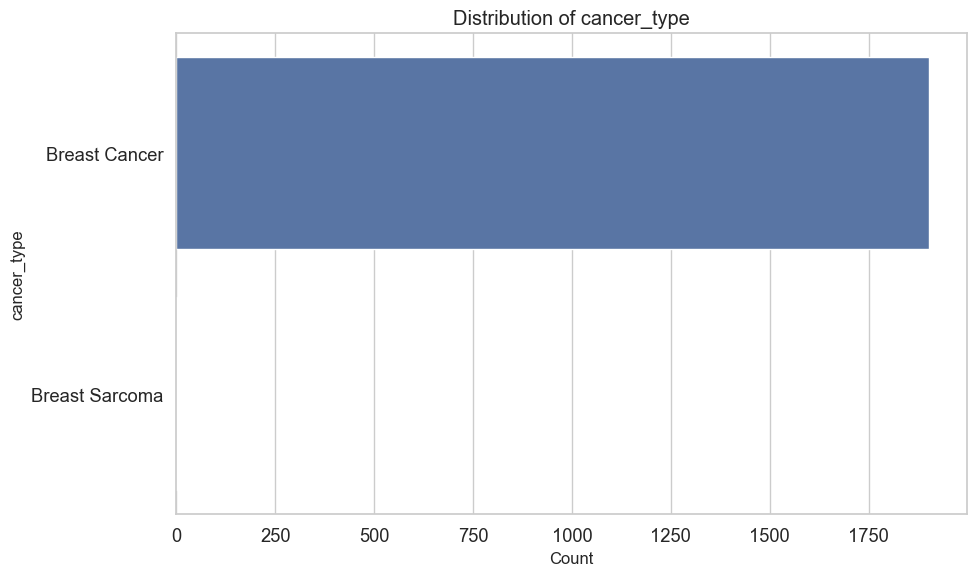


Unique values in 'cancer_type_detailed':


,Count,Percentage
cancer_type_detailed,,
Breast Invasive Ductal Carcinoma,1500,78.78
Breast Mixed Ductal and Lobular Carcinoma,207,10.87
Breast Invasive Lobular Carcinoma,142,7.46
Breast Invasive Mixed Mucinous Carcinoma,22,1.16
Breast,17,0.89
Metaplastic Breast Cancer,1,0.05


Successfully saved: categorical_cancer_type_detailed.png


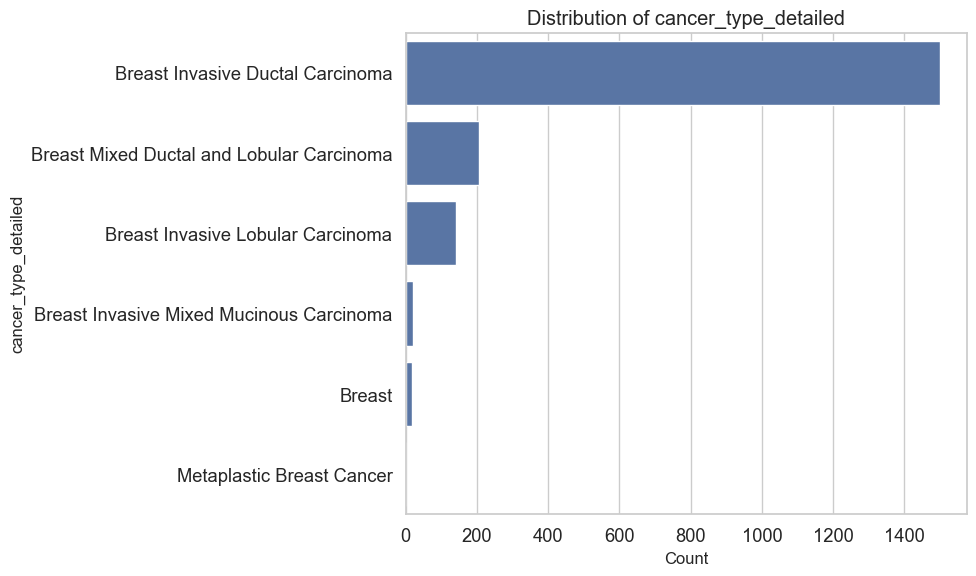


Unique values in 'cellularity':


,Count,Percentage
cellularity,,
High,939,49.32
Moderate,711,37.34
Low,200,10.50


Successfully saved: categorical_cellularity.png


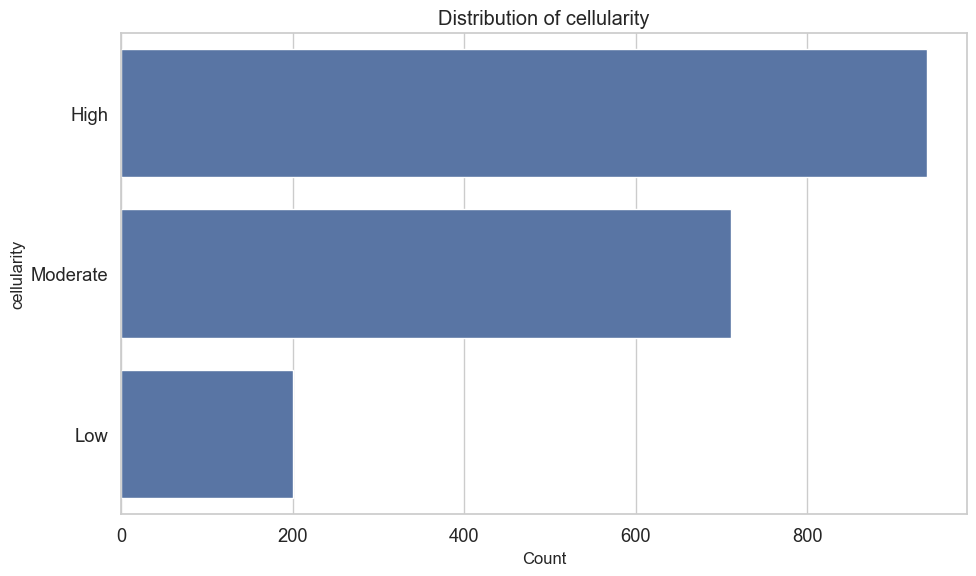


Unique values in 'pam50_+_claudin-low_subtype':


,Count,Percentage
pam50_+_claudin-low_subtype,,
LumA,679,35.66
LumB,461,24.21
Her2,220,11.55
claudin-low,199,10.45
Basal,199,10.45
Normal,140,7.35
NC,6,0.32


Successfully saved: categorical_pam50_+_claudin-low_subtype.png


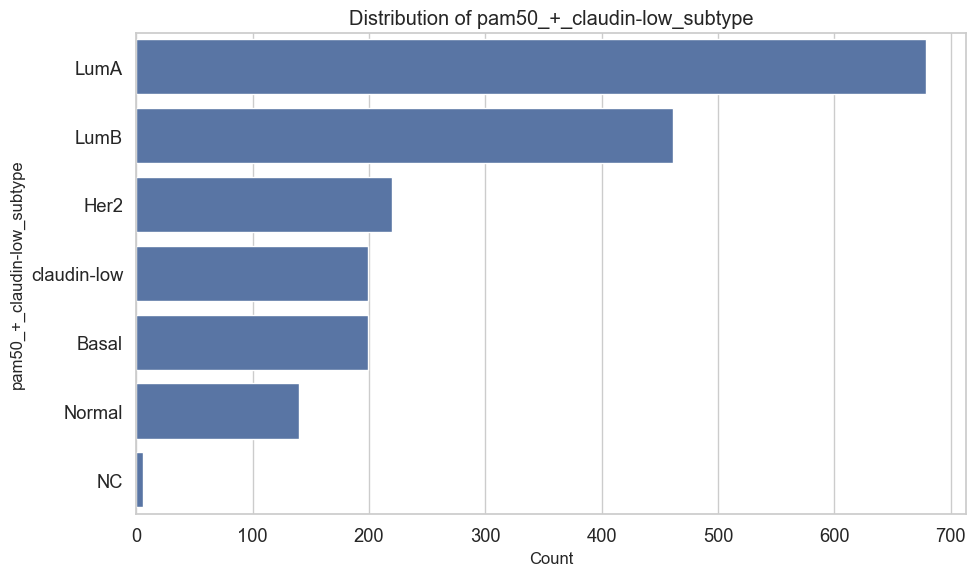


Unique values in 'er_status_measured_by_ihc':


,Count,Percentage
er_status_measured_by_ihc,,
Positve,1445,75.89
Negative,429,22.53


Successfully saved: categorical_er_status_measured_by_ihc.png


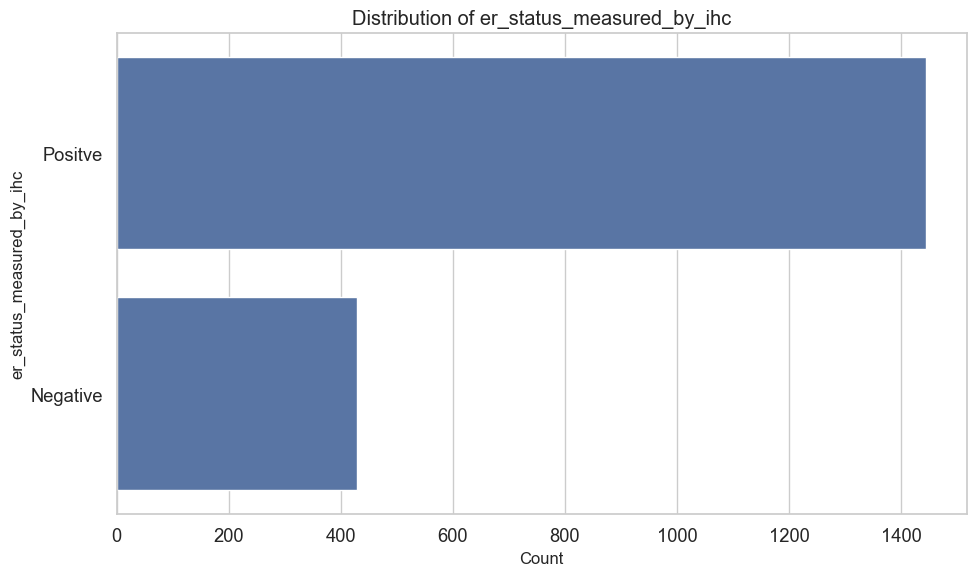


Unique values in 'er_status':


,Count,Percentage
er_status,,
Positive,1459,76.63
Negative,445,23.37


Successfully saved: categorical_er_status.png


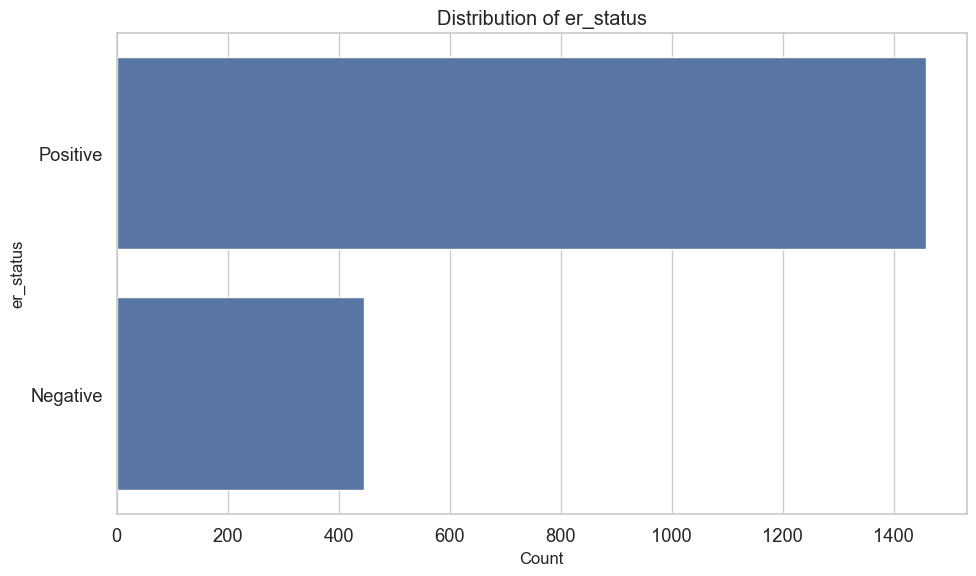


Unique values in 'her2_status_measured_by_snp6':


,Count,Percentage
her2_status_measured_by_snp6,,
NEUTRAL,1383,72.64
GAIN,417,21.90
LOSS,100,5.25
UNDEF,4,0.21


Successfully saved: categorical_her2_status_measured_by_snp6.png


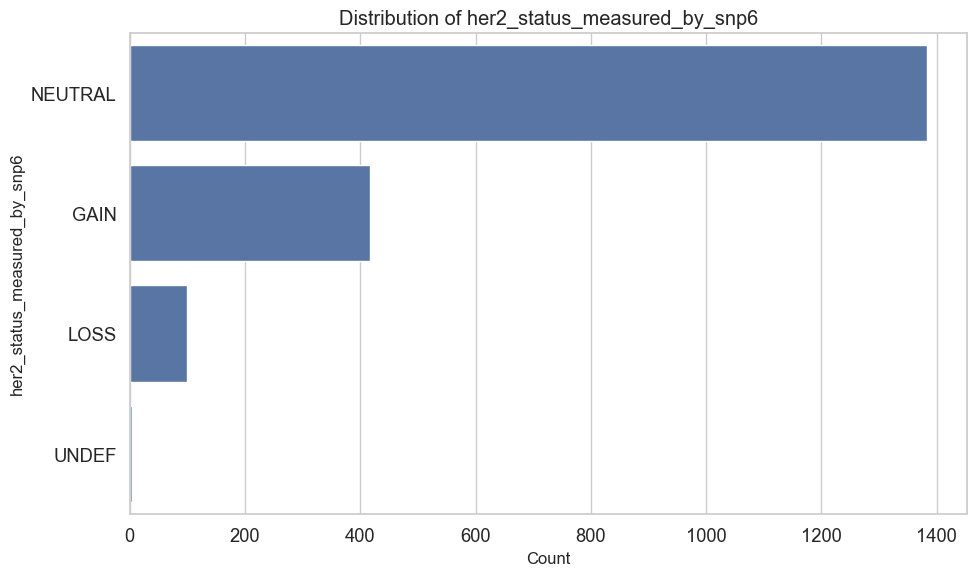


Unique values in 'her2_status':


,Count,Percentage
her2_status,,
Negative,1668,87.61
Positive,236,12.39


Successfully saved: categorical_her2_status.png


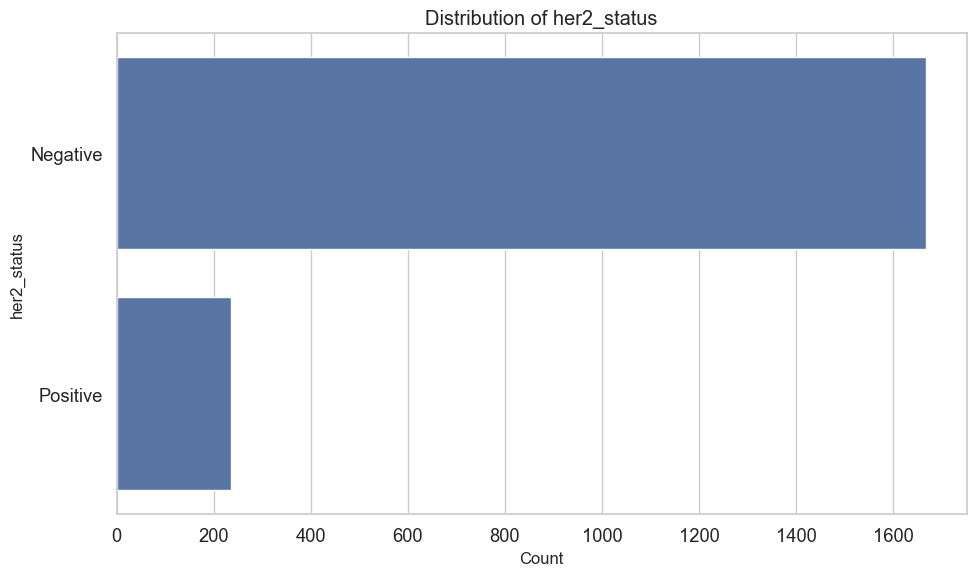


Unique values in 'tumor_other_histologic_subtype':


,Count,Percentage
tumor_other_histologic_subtype,,
Ductal/NST,1454,76.37
Mixed,207,10.87
Lobular,142,7.46
Medullary,25,1.31
Mucinous,22,1.16
Tubular/ cribriform,21,1.10
Other,17,0.89
Metaplastic,1,0.05


Successfully saved: categorical_tumor_other_histologic_subtype.png


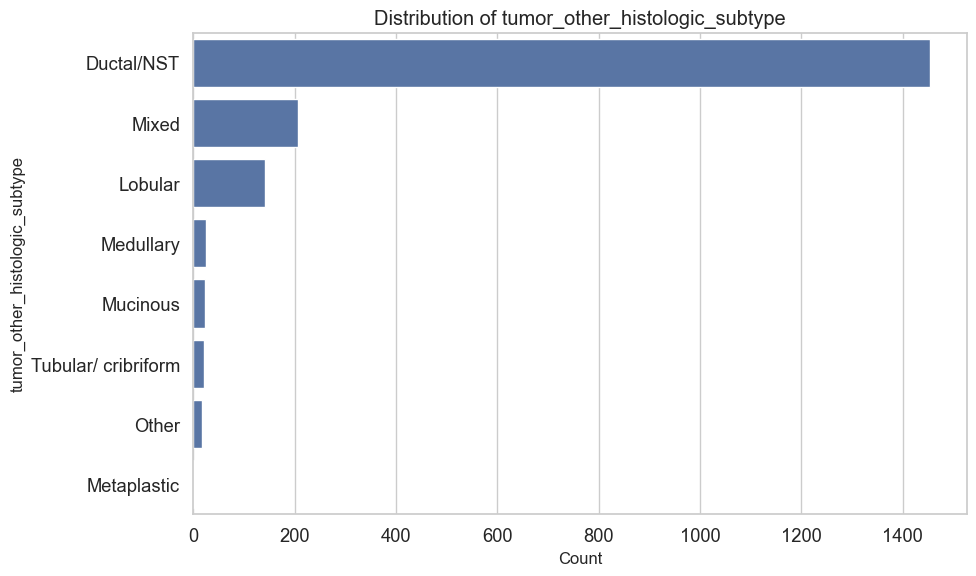


Unique values in 'inferred_menopausal_state':


,Count,Percentage
inferred_menopausal_state,,
Post,1493,78.41
Pre,411,21.59


Successfully saved: categorical_inferred_menopausal_state.png


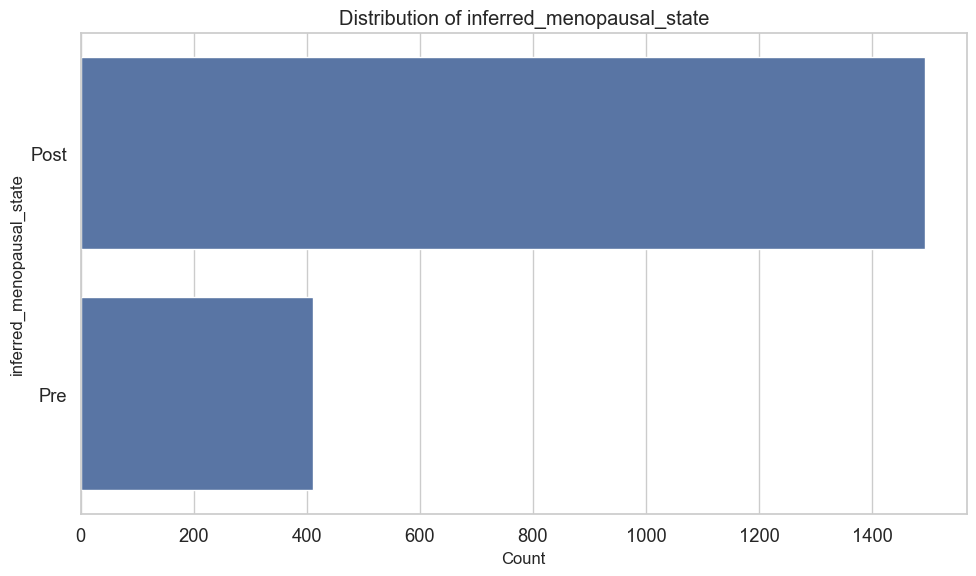


Unique values in 'integrative_cluster':


,Count,Percentage
integrative_cluster,,
8,289,15.18
3,282,14.81
4ER+,244,12.82
10,219,11.50
5,184,9.66
7,182,9.56
9,142,7.46
1,132,6.93
6,84,4.41


Successfully saved: categorical_integrative_cluster.png


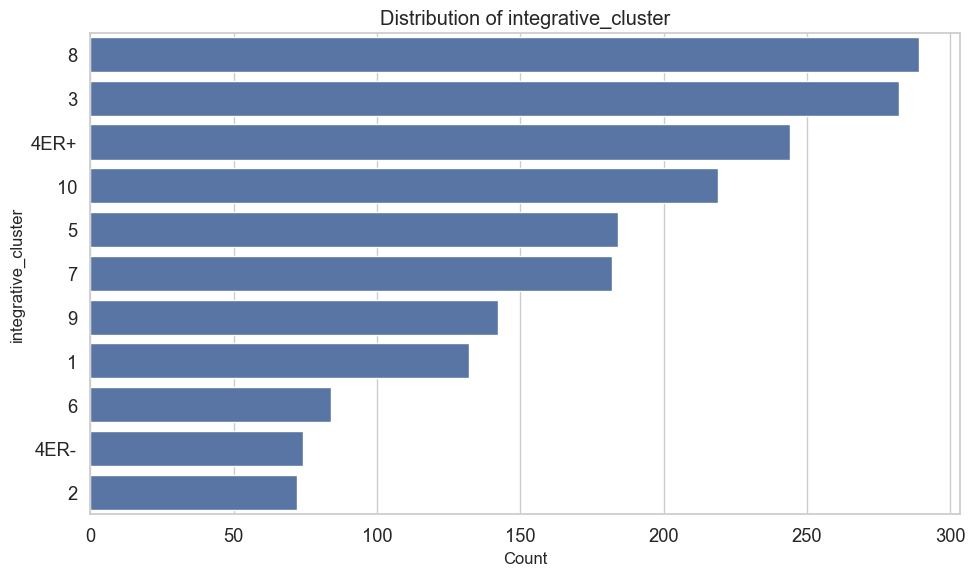


Unique values in 'primary_tumor_laterality':


,Count,Percentage
primary_tumor_laterality,,
Left,935,49.11
Right,863,45.33


Successfully saved: categorical_primary_tumor_laterality.png


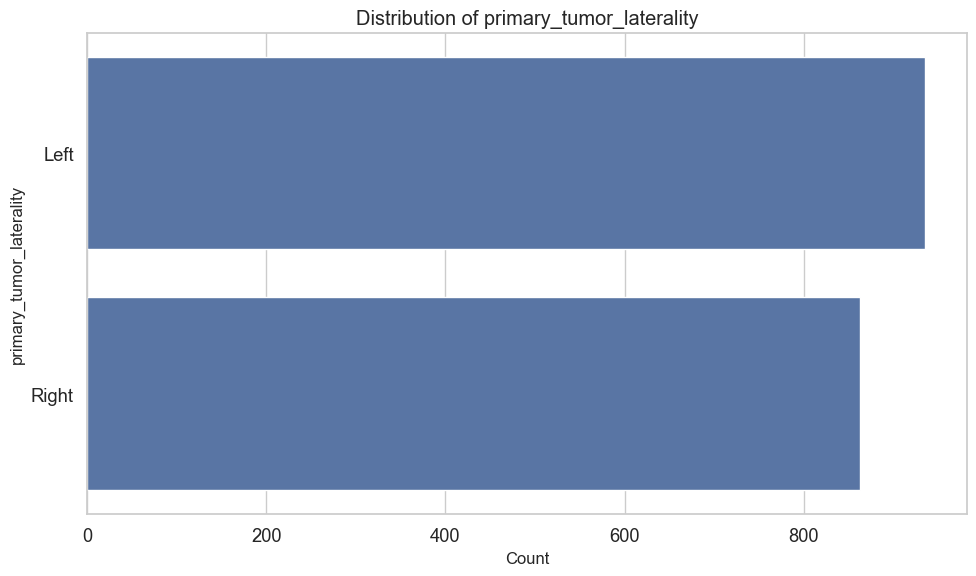


Unique values in 'oncotree_code':


,Count,Percentage
oncotree_code,,
IDC,1500,78.78
MDLC,207,10.87
ILC,142,7.46
IMMC,22,1.16
BREAST,17,0.89
MBC,1,0.05


Successfully saved: categorical_oncotree_code.png


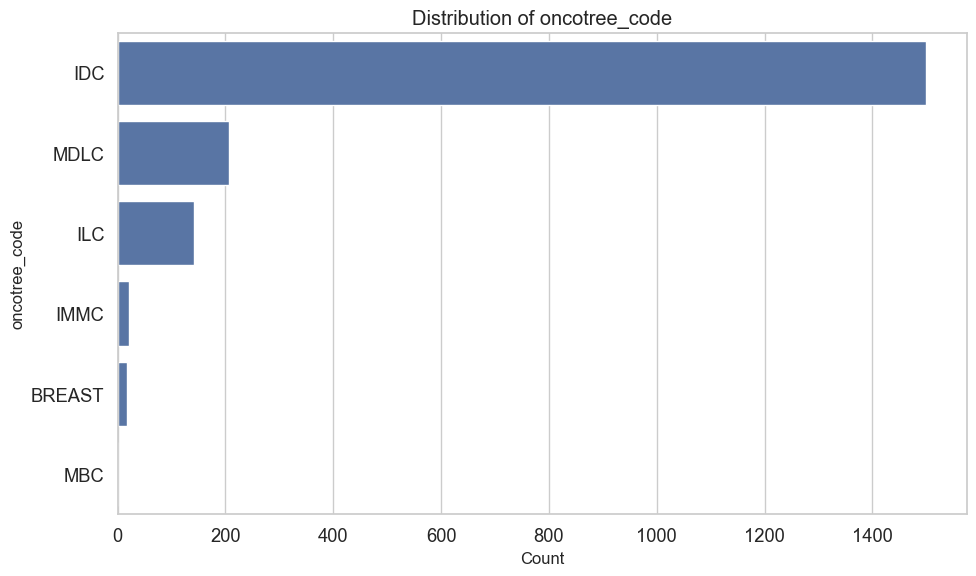


Unique values in 'pr_status':


,Count,Percentage
pr_status,,
Positive,1009,52.99
Negative,895,47.01


Successfully saved: categorical_pr_status.png


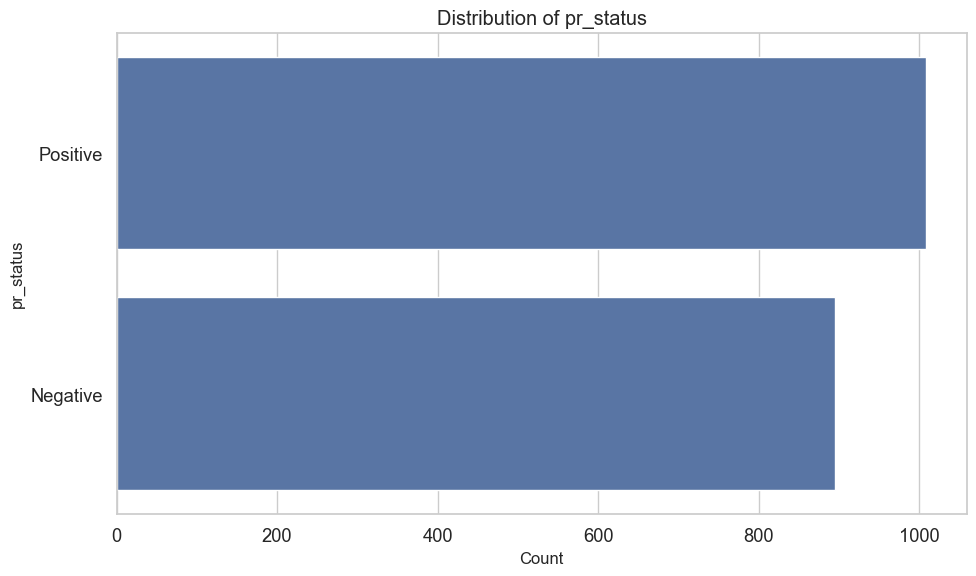


Unique values in '3-gene_classifier_subtype':


,Count,Percentage
3-gene_classifier_subtype,,
ER+/HER2- Low Prolif,619,32.51
ER+/HER2- High Prolif,603,31.67
ER-/HER2-,290,15.23
HER2+,188,9.87


Successfully saved: categorical_3-gene_classifier_subtype.png


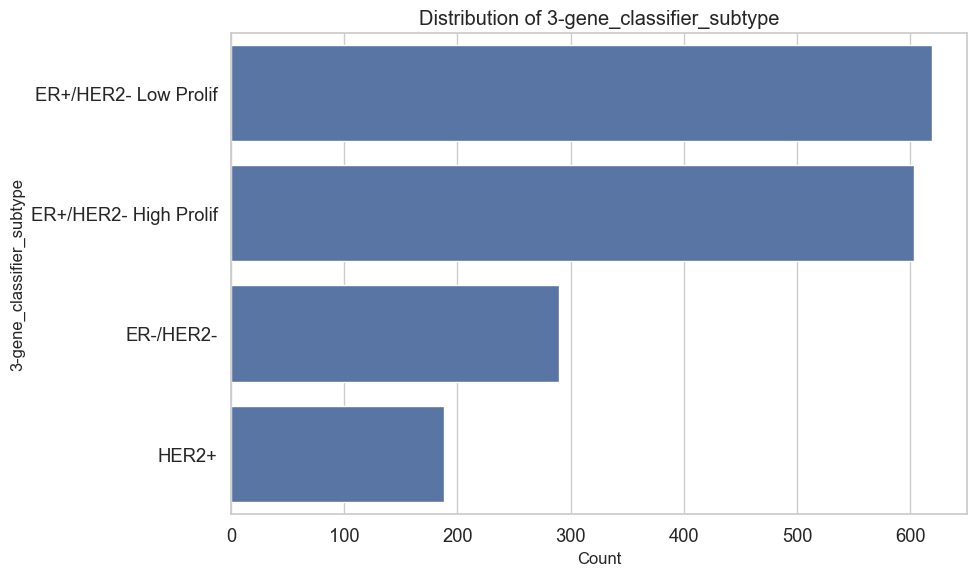


Unique values in 'death_from_cancer':


,Count,Percentage
death_from_cancer,,
Living,801,42.07
Died of Disease,622,32.67
Died of Other Causes,480,25.21


Successfully saved: categorical_death_from_cancer.png


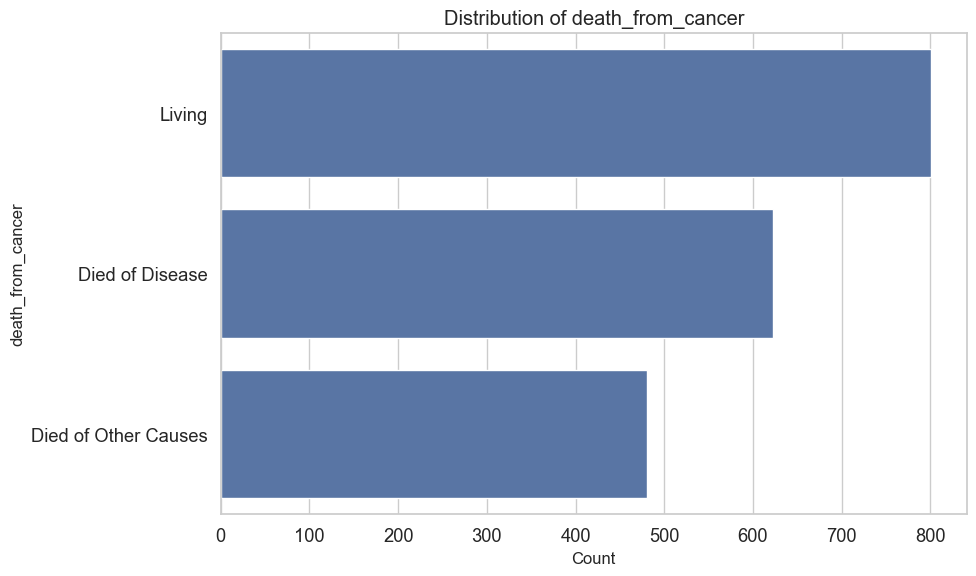


Unique values in 'pik3ca_mut':


,Count,Percentage
pik3ca_mut,,
0,1109,58.25
H1047R,285,14.97
E545K,127,6.67
E542K,72,3.78
N345K,42,2.21
H1047L,29,1.52
C420R,12,0.63
Q546R,8,0.42
E545G,6,0.32



Unique values in 'tp53_mut':


,Count,Percentage
tp53_mut,,
0,1245,65.39
R175H,34,1.79
R248Q,20,1.05
R248W,17,0.89
R213*,15,0.79
R273H,12,0.63
R306*,12,0.63
E285K,10,0.53
R273C,9,0.47



Unique values in 'muc16_mut':


,Count,Percentage
muc16_mut,,
0,1578,82.88
L7102F,5,0.26
T7149A,4,0.21
D902A,3,0.16
V8260M,3,0.16
D4992G,3,0.16
M6048T,3,0.16
S5929F P10004S,2,0.11
A6519E,2,0.11



Unique values in 'ahnak2_mut':


,Count,Percentage
ahnak2_mut,,
0,1593,83.67
V2061L,34,1.79
G812A,5,0.26
H1235P,3,0.16
G400S,3,0.16
D2099Y,3,0.16
E1678Q,3,0.16
P29S,2,0.11
S3603R A1115T,2,0.11



Unique values in 'kmt2c_mut':


,Count,Percentage
kmt2c_mut,,
0,1670,87.71
P3555T,3,0.16
H1424=,3,0.16
Q2128P,3,0.16
M1819T,2,0.11
E78Nfs*17,2,0.11
R841W,2,0.11
Q2348*,2,0.11
Q2161*,2,0.11



Unique values in 'syne1_mut':


,Count,Percentage
syne1_mut,,
0,1672,87.82
D4637N,7,0.37
R1344Q I2386V,5,0.26
D8448N,4,0.21
G7638D,3,0.16
R5432Q,3,0.16
E1179A,3,0.16
R1091W,3,0.16
I2316V,2,0.11



Unique values in 'gata3_mut':


,Count,Percentage
gata3_mut,,
0,1674,87.92
X308_splice,59,3.10
M293K,9,0.47
D335Gfs*17,5,0.26
X350_splice,5,0.26
D160E,4,0.21
P408Afs*99,3,0.16
*444Lfs*63,3,0.16
S426Ifs*81,3,0.16



Unique values in 'map3k1_mut':


,Count,Percentage
map3k1_mut,,
0,1706,89.60
Q1199*,2,0.11
Q700*,2,0.11
G102R,2,0.11
R763Cfs*35,2,0.11
R364W,2,0.11
F1029Sfs*53 T457Qfs*30,1,0.05
W560*,1,0.05
R60del,1,0.05



Unique values in 'ahnak_mut':


,Count,Percentage
ahnak_mut,,
0,1728,90.76
G5496E,5,0.26
G2655V,4,0.21
M1982I,3,0.16
G5675del,2,0.11
V3795A,2,0.11
P2800Q,2,0.11
S5190C,2,0.11
P3943A,2,0.11



Unique values in 'dnah11_mut':


,Count,Percentage
dnah11_mut,,
0,1729,90.81
P4211L,6,0.32
T1428A,5,0.26
P232L,5,0.26
S2963Y,4,0.21
T529S,2,0.11
R4136C,2,0.11
L3543F,2,0.11
R2891W,2,0.11



Unique values in 'cdh1_mut':


,Count,Percentage
cdh1_mut,,
0,1732,90.97
Q23*,11,0.58
Q610*,6,0.32
A719Lfs*3,3,0.16
X379_splice,3,0.16
T115Nfs*53,3,0.16
V202Cfs*7,2,0.11
W4*,2,0.11
D183Tfs*32,2,0.11



Unique values in 'dnah2_mut':


,Count,Percentage
dnah2_mut,,
0,1754,92.12
R837C,4,0.21
D2160V,3,0.16
T1263M,3,0.16
C411F,3,0.16
D3355N,2,0.11
R3527Q,2,0.11
V2462I,2,0.11
Y4171C R2564H,2,0.11



Unique values in 'kmt2d_mut':


,Count,Percentage
kmt2d_mut,,
0,1764,92.65
P3794S,4,0.21
Q2170E,3,0.16
P3490L,2,0.11
Q3724_Q3725insCS,2,0.11
P702S,2,0.11
A5187T,2,0.11
E1080Q,2,0.11
P3671A,2,0.11



Unique values in 'ush2a_mut':


,Count,Percentage
ush2a_mut,,
0,1765,92.70
P196S,3,0.16
G4838R,2,0.11
P1076S,2,0.11
A3975T,2,0.11
T1390R,2,0.11
W2693*,1,0.05
T4979N,1,0.05
W1487R,1,0.05



Unique values in 'ryr2_mut':


,Count,Percentage
ryr2_mut,,
0,1769,92.91
X3646_splice,2,0.11
V873M,2,0.11
N1551S,2,0.11
S1295G,2,0.11
A2632V,1,0.05
X563_splice,1,0.05
A3194S,1,0.05
P1624T C2572G,1,0.05



Unique values in 'dnah5_mut':


,Count,Percentage
dnah5_mut,,
0,1772,93.07
R3000Q,3,0.16
S321L,2,0.11
S3861R,2,0.11
F4392C,2,0.11
L123F,2,0.11
P1603T,2,0.11
D586Y,2,0.11
S906T,1,0.05



Unique values in 'herc2_mut':


,Count,Percentage
herc2_mut,,
0,1776,93.28
H4640R,5,0.26
K1849R,4,0.21
N4553T,4,0.21
I4091T,3,0.16
S3475F,2,0.11
D4267E,2,0.11
R402H,2,0.11
A4253T,2,0.11



Unique values in 'pde4dip_mut':


,Count,Percentage
pde4dip_mut,,
0,1786,93.80
A1324S,4,0.21
Q573P R1378Q,3,0.16
R2117Q,3,0.16
R571H,2,0.11
M1006V,2,0.11
L353F,2,0.11
Q1785H,2,0.11
S1770R,2,0.11



Unique values in 'akap9_mut':


,Count,Percentage
akap9_mut,,
0,1787,93.86
E3008K,2,0.11
Q2591H,2,0.11
T1683M,2,0.11
C1144R,2,0.11
S1028N,2,0.11
R3233H,2,0.11
M3743I,2,0.11
E1820D,2,0.11



Unique values in 'tg_mut':


,Count,Percentage
tg_mut,,
0,1790,94.01
D2001N,3,0.16
P1623R,3,0.16
R152H,3,0.16
A993T,2,0.11
P612T,2,0.11
E2550K,2,0.11
V73M,2,0.11
R1398H,2,0.11



Unique values in 'birc6_mut':


,Count,Percentage
birc6_mut,,
0,1797,94.38
H1881Y,2,0.11
I1817V,2,0.11
S3044G,2,0.11
V1047I,2,0.11
G4833D,2,0.11
L3166=,2,0.11
T2551M,1,0.05
V4098E,1,0.05



Unique values in 'utrn_mut':


,Count,Percentage
utrn_mut,,
0,1802,94.64
N611S,6,0.32
S145L,3,0.16
I284T,2,0.11
V1460I,2,0.11
M483L,2,0.11
R2064C,2,0.11
V235I,2,0.11
T1565I,1,0.05



Unique values in 'tbx3_mut':


,Count,Percentage
tbx3_mut,,
0,1803,94.70
S371I,2,0.11
S615A,2,0.11
D295del,2,0.11
N211T,2,0.11
L263Nfs*20,1,0.05
X591_splice,1,0.05
V33L,1,0.05
D295N,1,0.05



Unique values in 'col6a3_mut':


,Count,Percentage
col6a3_mut,,
0,1807,94.91
A259V,3,0.16
E1899G,2,0.11
S1870N,2,0.11
R1252C,2,0.11
D1350N,2,0.11
A2787T,2,0.11
T1140M,2,0.11
D410N,2,0.11



Unique values in 'arid1a_mut':


,Count,Percentage
arid1a_mut,,
0,1808,94.96
Q31del,2,0.11
Q611*,2,0.11
V1526M,2,0.11
L1831V,2,0.11
Q1212*,2,0.11
Q393*,2,0.11
P533S,2,0.11
M1224Cfs*13,1,0.05



Unique values in 'lama2_mut':


,Count,Percentage
lama2_mut,,
0,1809,95.01
Q2043R,4,0.21
W739C,2,0.11
I2092N,2,0.11
A5T,2,0.11
P2823S,2,0.11
E308K,2,0.11
I1210V,2,0.11
Q131L,1,0.05



Unique values in 'notch1_mut':


,Count,Percentage
notch1_mut,,
0,1809,95.01
T311A,7,0.37
P743T,2,0.11
R176Q,2,0.11
T1344M,2,0.11
L2457V,2,0.11
H1190P,2,0.11
G661S,2,0.11
A2044T,2,0.11



Unique values in 'cbfb_mut':


,Count,Percentage
cbfb_mut,,
0,1812,95.17
X55_splice,20,1.05
R35P,3,0.16
X27_splice,2,0.11
X56_splice,2,0.11
N104S,2,0.11
Q41*,2,0.11
L138*,2,0.11
E130*,2,0.11



Unique values in 'ncor2_mut':


,Count,Percentage
ncor2_mut,,
0,1815,95.33
A688V,3,0.16
R1716C,3,0.16
S1838_G1839insAAS,2,0.11
H1876Y,2,0.11
E2048K,2,0.11
T35M,1,0.05
S1976L,1,0.05
R1254C,1,0.05



Unique values in 'col12a1_mut':


,Count,Percentage
col12a1_mut,,
0,1822,95.69
P2944L,3,0.16
S2861N,3,0.16
T2408M,2,0.11
R1834Q,2,0.11
V1823I,2,0.11
E2493_C2501delinsD,1,0.05
N1538S,1,0.05
V2350L,1,0.05



Unique values in 'col22a1_mut':


,Count,Percentage
col22a1_mut,,
0,1824,95.80
D500H,7,0.37
P562L,2,0.11
L159P,2,0.11
S1284C,2,0.11
R167G,2,0.11
D426G,2,0.11
D363A,1,0.05
D415=,1,0.05



Unique values in 'pten_mut':


,Count,Percentage
pten_mut,,
0,1825,95.85
Y176C,2,0.11
I33del,2,0.11
Q245*,2,0.11
R130Q,2,0.11
X343_splice,2,0.11
Y336*,2,0.11
X70_splice,2,0.11
V317Lfs*2,1,0.05



Unique values in 'akt1_mut':


,Count,Percentage
akt1_mut,,
0,1826,95.90
E17K,63,3.31
L52R,4,0.21
W80R,2,0.11
E94K,1,0.05
D323G,1,0.05
Q79_W80insSGPGPTPSSSAACR,1,0.05
L235=,1,0.05
G303S,1,0.05


Successfully saved: categorical_akt1_mut.png


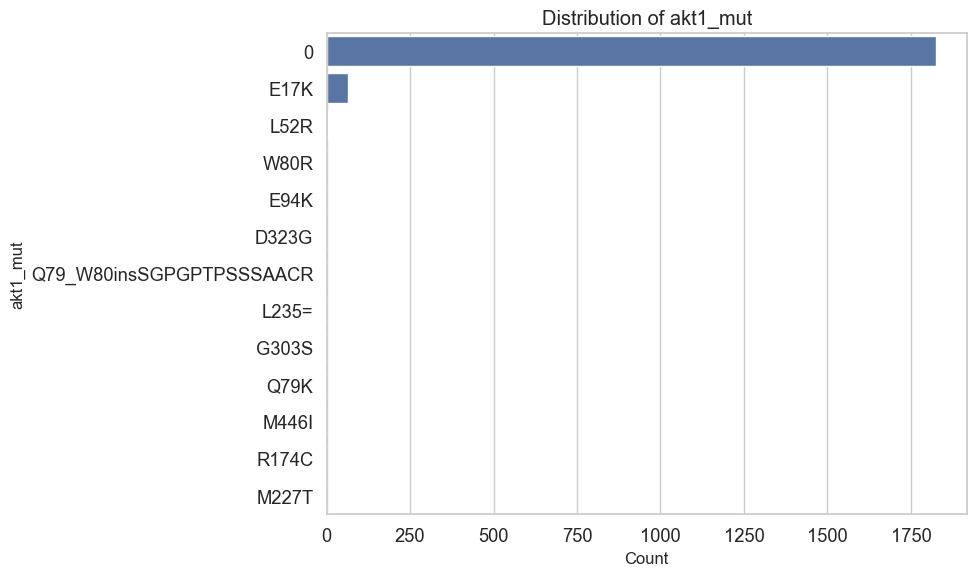


Unique values in 'atr_mut':


,Count,Percentage
atr_mut,,
0,1827,95.96
T1469A,3,0.16
M1996T,2,0.11
I1753V,2,0.11
E1986_P1990del,2,0.11
L2554F A1694S,1,0.05
V157I,1,0.05
T1337I,1,0.05
I2435V,1,0.05



Unique values in 'thada_mut':


,Count,Percentage
thada_mut,,
0,1827,95.96
E1925K,5,0.26
R923Q,3,0.16
T1085M,3,0.16
M1073I,2,0.11
G390R,2,0.11
V1129M,2,0.11
D1936V,1,0.05
L1010V,1,0.05



Unique values in 'ncor1_mut':


,Count,Percentage
ncor1_mut,,
0,1828,96.01
V1542M,2,0.11
G1168=,2,0.11
M2290I,1,0.05
S2244Qfs*49,1,0.05
Y479Ifs*2,1,0.05
X391_splice R190*,1,0.05
S2438G,1,0.05
I253N,1,0.05



Unique values in 'stab2_mut':


,Count,Percentage
stab2_mut,,
0,1829,96.06
R1200W,3,0.16
E1388K,3,0.16
G2018R,3,0.16
I1816M,2,0.11
C914F,1,0.05
P876A,1,0.05
C31R,1,0.05
Y95S,1,0.05



Unique values in 'myh9_mut':


,Count,Percentage
myh9_mut,,
0,1833,96.27
N470S,4,0.21
X720_splice,2,0.11
K1793R,2,0.11
A864V,2,0.11
E495K G681S,1,0.05
V761Sfs*17,1,0.05
R1342Q,1,0.05
A971T,1,0.05



Unique values in 'runx1_mut':


,Count,Percentage
runx1_mut,,
0,1835,96.38
X178_splice,3,0.16
M25K,3,0.16
X242_splice,2,0.11
S73F,2,0.11
R80L,1,0.05
G282S,1,0.05
L71Pfs*40,1,0.05
I264Sfs*308,1,0.05



Unique values in 'nf1_mut':


,Count,Percentage
nf1_mut,,
0,1836,96.43
Y2285Tfs*5,3,0.16
Q756*,2,0.11
R1241*,2,0.11
X420_splice T419A,1,0.05
S1420*,1,0.05
E2692K E291K,1,0.05
N45S,1,0.05
R2083C,1,0.05



Unique values in 'map2k4_mut':


,Count,Percentage
map2k4_mut,,
0,1840,96.64
S184L,6,0.32
R110*,3,0.16
R281*,2,0.11
R304*,2,0.11
Q316*,2,0.11
X212_splice,2,0.11
R228K,2,0.11
S257F,2,0.11



Unique values in 'ros1_mut':


,Count,Percentage
ros1_mut,,
0,1844,96.85
Y382H,4,0.21
P937=,2,0.11
Q291P,2,0.11
K1026M F942L,2,0.11
L1209*,2,0.11
R2039H,2,0.11
T722M,1,0.05
G2282D,1,0.05



Unique values in 'lamb3_mut':


,Count,Percentage
lamb3_mut,,
0,1845,96.90
R366W,2,0.11
R1023W,2,0.11
P679L,2,0.11
D547N,2,0.11
A590V,2,0.11
R747S,2,0.11
R1135W,2,0.11
R598C,2,0.11



Unique values in 'arid1b_mut':


,Count,Percentage
arid1b_mut,,
0,1845,96.90
D1728del,7,0.37
A767T,2,0.11
M900I,2,0.11
G223del,2,0.11
G1882E,1,0.05
S946Tfs*9,1,0.05
L768F,1,0.05
D1914E,1,0.05



Unique values in 'erbb2_mut':


,Count,Percentage
erbb2_mut,,
0,1846,96.95
L755S,10,0.53
L755_T759del,4,0.21
D769Y,4,0.21
P523S,3,0.16
V777L,2,0.11
V842I,2,0.11
P122L,2,0.11
R929W,2,0.11



Unique values in 'sf3b1_mut':


,Count,Percentage
sf3b1_mut,,
0,1846,96.95
K700E,36,1.89
K666T,2,0.11
V352I,1,0.05
W658S,1,0.05
N626H,1,0.05
R1259Q,1,0.05
A899V,1,0.05
S851C,1,0.05



Unique values in 'shank2_mut':


,Count,Percentage
shank2_mut,,
0,1847,97.01
A1350T,2,0.11
Q929R,2,0.11
V1229I,2,0.11
K917N,2,0.11
A279G,1,0.05
G299R,1,0.05
D1186H,1,0.05
T446M,1,0.05



Unique values in 'ep300_mut':


,Count,Percentage
ep300_mut,,
0,1850,97.16
P930L,2,0.11
E1011K,2,0.11
P802L,2,0.11
P250R,1,0.05
G752A,1,0.05
N1126S,1,0.05
M1942R,1,0.05
A877V,1,0.05



Unique values in 'ptprd_mut':


,Count,Percentage
ptprd_mut,,
0,1850,97.16
Y751F,3,0.16
G1719W,2,0.11
R1674H,1,0.05
I913V,1,0.05
T978A,1,0.05
R28Q,1,0.05
G567A,1,0.05
E1135K,1,0.05



Unique values in 'usp9x_mut':


,Count,Percentage
usp9x_mut,,
0,1850,97.16
Q640H,3,0.16
S2521C,2,0.11
G1890E,2,0.11
I126M I1239S,2,0.11
Y1953C,1,0.05
P1105S,1,0.05
P2267S,1,0.05
Q1980P,1,0.05



Unique values in 'setd2_mut':


,Count,Percentage
setd2_mut,,
0,1850,97.16
T1897P,2,0.11
V2229G,2,0.11
S1572=,2,0.11
V2233A,1,0.05
S681C,1,0.05
D1342H,1,0.05
E1432G,1,0.05
D995E,1,0.05



Unique values in 'setd1a_mut':


,Count,Percentage
setd1a_mut,,
0,1851,97.22
S1013L,3,0.16
Y743C,3,0.16
V1321M,2,0.11
R1227Q,2,0.11
S341F,2,0.11
T213M,2,0.11
D1384N,1,0.05
E1007K,1,0.05



Unique values in 'thsd7a_mut':


,Count,Percentage
thsd7a_mut,,
0,1852,97.27
V419A,2,0.11
S1522G,2,0.11
D166G,2,0.11
G149R,1,0.05
Q460H,1,0.05
P703H,1,0.05
D779G,1,0.05
D1514N,1,0.05



Unique values in 'afdn_mut':


,Count,Percentage
afdn_mut,,
0,1853,97.32
R1596H,5,0.26
P574L,2,0.11
L990F,2,0.11
R559Sfs*6,2,0.11
A493S,1,0.05
R224*,1,0.05
A134V,1,0.05
R1612_Q1613insA,1,0.05



Unique values in 'erbb3_mut':


,Count,Percentage
erbb3_mut,,
0,1854,97.37
E928G,8,0.42
G284R,3,0.16
R490H,2,0.11
T906S,2,0.11
V104L,2,0.11
A1131T G113R,1,0.05
R135H,1,0.05
S1207N,1,0.05



Unique values in 'rb1_mut':


,Count,Percentage
rb1_mut,,
0,1855,97.43
G310E,2,0.11
P29del,2,0.11
X654_splice,1,0.05
T118S,1,0.05
R251*,1,0.05
L797*,1,0.05
E204Gfs*8,1,0.05
V222Pfs*2,1,0.05



Unique values in 'myo1a_mut':


,Count,Percentage
myo1a_mut,,
0,1857,97.53
E1009del,4,0.21
S1026G,2,0.11
G674D,2,0.11
R643W,2,0.11
E102K,2,0.11
E978*,1,0.05
R654Q,1,0.05
Y340C,1,0.05



Unique values in 'alk_mut':


,Count,Percentage
alk_mut,,
0,1858,97.58
F921Gfs*16,2,0.11
R1181C,2,0.11
G1054S,2,0.11
X472_splice,1,0.05
A3_I4insKQCKRPPPAGWEP,1,0.05
E1409D,1,0.05
E949K,1,0.05
Y276H,1,0.05



Unique values in 'fanca_mut':


,Count,Percentage
fanca_mut,,
0,1858,97.58
R1144W,4,0.21
D1429N,2,0.11
A152G,2,0.11
R163C,1,0.05
R951Q,1,0.05
Q153* E1420K,1,0.05
E886D,1,0.05
R1425H,1,0.05



Unique values in 'adgra2_mut':


,Count,Percentage
adgra2_mut,,
0,1858,97.58
C1196Y,3,0.16
S1276G,2,0.11
T397P,2,0.11
Q378E,1,0.05
S1116Lfs*150,1,0.05
R799H,1,0.05
R100C,1,0.05
G1308R,1,0.05



Unique values in 'ubr5_mut':


,Count,Percentage
ubr5_mut,,
0,1858,97.58
S913G,2,0.11
R1898=,2,0.11
P1518S,1,0.05
T1400A,1,0.05
N2319S,1,0.05
V8I,1,0.05
R1900H,1,0.05
P640L,1,0.05



Unique values in 'pik3r1_mut':


,Count,Percentage
pik3r1_mut,,
0,1859,97.64
V181I,3,0.16
K567_L570del,2,0.11
X580_splice,2,0.11
N564D,2,0.11
Y580_M582del,1,0.05
S229L,1,0.05
Y6Tfs*25,1,0.05
D560delinsGQTYEQH*TN,1,0.05



Unique values in 'myo3a_mut':


,Count,Percentage
myo3a_mut,,
0,1859,97.64
R1495*,3,0.16
I51N,3,0.16
M894I,2,0.11
I610V,2,0.11
R1052Q,1,0.05
E1421Q,1,0.05
M493I,1,0.05
I1294V,1,0.05



Unique values in 'asxl2_mut':


,Count,Percentage
asxl2_mut,,
0,1859,97.64
D1179N,2,0.11
V1277A,2,0.11
Q1385E,2,0.11
G1324E,2,0.11
Q1385*,1,0.05
R357*,1,0.05
S600L,1,0.05
T943A,1,0.05



Unique values in 'apc_mut':


,Count,Percentage
apc_mut,,
0,1861,97.74
L180F,1,0.05
R2613K,1,0.05
E1157Q D539N R1336T,1,0.05
E2184K,1,0.05
Q223H,1,0.05
M438T,1,0.05
T1947A,1,0.05
R88W,1,0.05



Unique values in 'ctcf_mut':


,Count,Percentage
ctcf_mut,,
0,1861,97.74
R377H,2,0.11
C271F,2,0.11
H284Q,2,0.11
E145Rfs*7,1,0.05
H546Y,1,0.05
Q267Hfs*9 F266Lfs*3,1,0.05
X256_splice,1,0.05
H373D,1,0.05



Unique values in 'asxl1_mut':


,Count,Percentage
asxl1_mut,,
0,1862,97.79
R1224T,2,0.11
W1356*,2,0.11
L1304V,1,0.05
P229L,1,0.05
H1390Y,1,0.05
R596W,1,0.05
K9del,1,0.05
R734S,1,0.05



Unique values in 'fancd2_mut':


,Count,Percentage
fancd2_mut,,
0,1863,97.85
X905_splice,2,0.11
Y534C,1,0.05
W1268*,1,0.05
D1286Y,1,0.05
E369Q S409L,1,0.05
P759L,1,0.05
N1083S,1,0.05
Y1267Tfs*15,1,0.05



Unique values in 'taf1_mut':


,Count,Percentage
taf1_mut,,
0,1864,97.90
S439F,2,0.11
S1870C,1,0.05
I311=,1,0.05
C280S,1,0.05
R1257C,1,0.05
G89W,1,0.05
H1371R,1,0.05
E507K,1,0.05



Unique values in 'kdm6a_mut':


,Count,Percentage
kdm6a_mut,,
0,1864,97.90
L915S,3,0.16
C1234G,1,0.05
R481C,1,0.05
Q247E,1,0.05
P1327A,1,0.05
X1335_splice,1,0.05
S573F,1,0.05
D812H,1,0.05



Unique values in 'ctnna3_mut':


,Count,Percentage
ctnna3_mut,,
0,1866,98.00
R374C,2,0.11
E634K,2,0.11
M435V I411V,1,0.05
A255V,1,0.05
L858F,1,0.05
T240A,1,0.05
Q17*,1,0.05
G793E M435V I411V,1,0.05



Unique values in 'brca1_mut':


,Count,Percentage
brca1_mut,,
0,1867,98.06
Y1127H,2,0.11
I171M,1,0.05
E880Rfs*13,1,0.05
S1266T,1,0.05
D560Efs*6,1,0.05
E1836K,1,0.05
E391K,1,0.05
E1287K,1,0.05



Unique values in 'ptprm_mut':


,Count,Percentage
ptprm_mut,,
0,1867,98.06
T811M,2,0.11
I647V,2,0.11
A291T,2,0.11
R138H,1,0.05
T890A,1,0.05
F753S,1,0.05
D1015V,1,0.05
R699K,1,0.05



Unique values in 'foxo3_mut':


,Count,Percentage
foxo3_mut,,
0,1868,98.11
P10L,2,0.11
A352T,1,0.05
T433M,1,0.05
X208_splice,1,0.05
R444H,1,0.05
I170F,1,0.05
W206L,1,0.05
T582S,1,0.05



Unique values in 'usp28_mut':


,Count,Percentage
usp28_mut,,
0,1868,98.11
Q35R,6,0.32
D969Y,4,0.21
I177T,3,0.16
A83S,2,0.11
F232S,2,0.11
E410Vfs*40,1,0.05
X722_splice Y914Kfs*53 M23I,1,0.05
R938W,1,0.05



Unique values in 'gldc_mut':


,Count,Percentage
gldc_mut,,
0,1869,98.16
S951Y,3,0.16
I717V,3,0.16
M394V,2,0.11
X820_splice,1,0.05
E909D,1,0.05
G48R Q285H,1,0.05
N193S,1,0.05
M840V,1,0.05



Unique values in 'brca2_mut':


,Count,Percentage
brca2_mut,,
0,1870,98.21
S3366Mfs*2 V3365_S3366insELY,3,0.16
E1514K,1,0.05
A3205V A3205P,1,0.05
Q3066*,1,0.05
S1115Lfs*4,1,0.05
V2687I,1,0.05
I1583T,1,0.05
Y3098*,1,0.05



Unique values in 'cacna2d3_mut':


,Count,Percentage
cacna2d3_mut,,
0,1870,98.21
R205G,3,0.16
T874=,2,0.11
N910K,2,0.11
R1042C,2,0.11
E681G,1,0.05
M892V,1,0.05
Q446R,1,0.05
A698T,1,0.05



Unique values in 'arid2_mut':


,Count,Percentage
arid2_mut,,
0,1870,98.21
P1594A,2,0.11
S1279G,1,0.05
N1295S,1,0.05
T1208P,1,0.05
T1522S,1,0.05
S1045L,1,0.05
K1627N,1,0.05
S748G,1,0.05



Unique values in 'aff2_mut':


,Count,Percentage
aff2_mut,,
0,1871,98.27
S374Y,4,0.21
H366R,2,0.11
V417M,1,0.05
T444A,1,0.05
T574M,1,0.05
R1238S,1,0.05
T975P,1,0.05
P791L,1,0.05



Unique values in 'lifr_mut':


,Count,Percentage
lifr_mut,,
0,1871,98.27
D1074G,3,0.16
I220N,1,0.05
D334G,1,0.05
A930S,1,0.05
H105R,1,0.05
S893R,1,0.05
N960D,1,0.05
R178C,1,0.05



Unique values in 'sbno1_mut':


,Count,Percentage
sbno1_mut,,
0,1872,98.32
P1351L,4,0.21
S1326G,2,0.11
P871A,1,0.05
D696H,1,0.05
I520V,1,0.05
M525V,1,0.05
D738H,1,0.05
R1336Q,1,0.05



Unique values in 'kdm3a_mut':


,Count,Percentage
kdm3a_mut,,
0,1872,98.32
P118S,3,0.16
Y1255H,2,0.11
I625T,2,0.11
C496Y,2,0.11
R107Q,1,0.05
E355K,1,0.05
G252V,1,0.05
V35L,1,0.05



Unique values in 'ncoa3_mut':


,Count,Percentage
ncoa3_mut,,
0,1873,98.37
G435R,2,0.11
N283D,2,0.11
Y852C,2,0.11
R1163Q,2,0.11
Q779P,1,0.05
M1210I,1,0.05
M391V,1,0.05
R251C,1,0.05



Unique values in 'bap1_mut':


,Count,Percentage
bap1_mut,,
0,1873,98.37
V354I,2,0.11
X220_splice,1,0.05
R179W,1,0.05
K331E,1,0.05
V24G,1,0.05
P293L,1,0.05
G422R,1,0.05
L49R,1,0.05



Unique values in 'l1cam_mut':


,Count,Percentage
l1cam_mut,,
0,1874,98.42
G919S,1,0.05
C57F,1,0.05
T50R,1,0.05
W635Gfs*58,1,0.05
R834W,1,0.05
M400V,1,0.05
K56T,1,0.05
M1012T,1,0.05



Unique values in 'pbrm1_mut':


,Count,Percentage
pbrm1_mut,,
0,1874,98.42
A1098S,3,0.16
V978I,2,0.11
E1318K,2,0.11
N716S,1,0.05
R332P,1,0.05
R341H,1,0.05
T737Sfs*31 Y738Dfs*8,1,0.05
V1086A,1,0.05



Unique values in 'chd1_mut':


,Count,Percentage
chd1_mut,,
0,1876,98.53
V96I,3,0.16
R1586H,2,0.11
E65Q,1,0.05
Y1553C,1,0.05
F277Lfs*43,1,0.05
E223del,1,0.05
E246*,1,0.05
D302N,1,0.05



Unique values in 'jak1_mut':


,Count,Percentage
jak1_mut,,
0,1876,98.53
D947=,6,0.32
S914I,1,0.05
P761H,1,0.05
E730K,1,0.05
V1017G,1,0.05
F482Y,1,0.05
E864K,1,0.05
H303Qfs*17,1,0.05



Unique values in 'setdb1_mut':


,Count,Percentage
setdb1_mut,,
0,1876,98.53
S1081I,1,0.05
R1086Q,1,0.05
D1044H,1,0.05
D607N,1,0.05
S1124L,1,0.05
I1037M,1,0.05
N988S,1,0.05
P950R,1,0.05



Unique values in 'fam20c_mut':


,Count,Percentage
fam20c_mut,,
0,1876,98.53
G153D,3,0.16
Y539S,2,0.11
D573N,2,0.11
T290M,1,0.05
V326I,1,0.05
A417=,1,0.05
L102I,1,0.05
R481T,1,0.05



Unique values in 'arid5b_mut':


,Count,Percentage
arid5b_mut,,
0,1876,98.53
E519K,2,0.11
E406K,1,0.05
H821R,1,0.05
A1172P,1,0.05
D636N,1,0.05
P487H,1,0.05
V280I,1,0.05
E765D,1,0.05



Unique values in 'egfr_mut':


,Count,Percentage
egfr_mut,,
0,1877,98.58
R836C,2,0.11
R334L,2,0.11
R705S,1,0.05
P20S,1,0.05
V674I,1,0.05
H145R,1,0.05
R98Q,1,0.05
V592I,1,0.05



Unique values in 'map3k10_mut':


,Count,Percentage
map3k10_mut,,
0,1877,98.58
R850H,2,0.11
V521M,2,0.11
G6E,1,0.05
P778_P781del,1,0.05
R512W,1,0.05
R569Q,1,0.05
V106L,1,0.05
I360F,1,0.05



Unique values in 'smarcc2_mut':


,Count,Percentage
smarcc2_mut,,
0,1877,98.58
P1043A,3,0.16
V3A,2,0.11
I818V,1,0.05
A1002D,1,0.05
R776Q,1,0.05
I1108V,1,0.05
E250K,1,0.05
P1089S,1,0.05



Unique values in 'erbb4_mut':


,Count,Percentage
erbb4_mut,,
0,1878,98.63
E542K,1,0.05
M1?,1,0.05
S184L,1,0.05
I381V,1,0.05
A90S,1,0.05
G1143A,1,0.05
E869K,1,0.05
R938S,1,0.05



Unique values in 'npnt_mut':


,Count,Percentage
npnt_mut,,
0,1878,98.63
T490M,3,0.16
T546N,3,0.16
R565H,1,0.05
K241E,1,0.05
N73D,1,0.05
I325V,1,0.05
A174T,1,0.05
D202N,1,0.05



Unique values in 'nek1_mut':


,Count,Percentage
nek1_mut,,
0,1879,98.69
V685M,2,0.11
A1014V,1,0.05
G764D,1,0.05
R714C,1,0.05
P318S,1,0.05
D651E,1,0.05
H1018Y,1,0.05
I939_Q942delinsK,1,0.05



Unique values in 'agmo_mut':


,Count,Percentage
agmo_mut,,
0,1879,98.69
R17C,2,0.11
T339Sfs*12,2,0.11
R405Q,2,0.11
I242del,1,0.05
I426V,1,0.05
G15R,1,0.05
X42_splice,1,0.05
P411L,1,0.05



Unique values in 'zfp36l1_mut':


,Count,Percentage
zfp36l1_mut,,
0,1880,98.74
P171Afs*10,1,0.05
K152Qfs*29,1,0.05
G33Rfs*48,1,0.05
S318Ffs*45,1,0.05
L185Rfs*8,1,0.05
S70T,1,0.05
G20Vfs*60,1,0.05
I329_F330del,1,0.05



Unique values in 'smad4_mut':


,Count,Percentage
smad4_mut,,
0,1880,98.74
Q245*,3,0.16
D493H,2,0.11
T222I,1,0.05
R135*,1,0.05
K340_S343del,1,0.05
R38Efs*7,1,0.05
W524C,1,0.05
X83_splice,1,0.05



Unique values in 'sik1_mut':


,Count,Percentage
sik1_mut,,
0,1880,98.74
A294V,2,0.11
S135L,2,0.11
P698R,1,0.05
A288S,1,0.05
P679Q,1,0.05
A354S,1,0.05
C774G,1,0.05
V260A,1,0.05



Unique values in 'casp8_mut':


,Count,Percentage
casp8_mut,,
0,1881,98.79
N198=,2,0.11
E376D,2,0.11
V150I,1,0.05
I38M,1,0.05
I144T,1,0.05
X1_splice,1,0.05
Q97*,1,0.05
D18H,1,0.05



Unique values in 'prkcq_mut':


,Count,Percentage
prkcq_mut,,
0,1881,98.79
L304S,2,0.11
V79M,2,0.11
L142F,1,0.05
X482_splice,1,0.05
W56L,1,0.05
Q192R,1,0.05
G138A,1,0.05
E137D,1,0.05



Unique values in 'smarcc1_mut':


,Count,Percentage
smarcc1_mut,,
0,1881,98.79
D250G,2,0.11
R299Q,2,0.11
E908Q,1,0.05
X216_splice,1,0.05
T337A,1,0.05
V710M,1,0.05
T375I,1,0.05
A985G,1,0.05



Unique values in 'palld_mut':


,Count,Percentage
palld_mut,,
0,1881,98.79
R341H,3,0.16
R689H,1,0.05
R663G,1,0.05
S286G,1,0.05
R138Q,1,0.05
R1049H,1,0.05
N23D,1,0.05
R908H,1,0.05



Unique values in 'dcaf4l2_mut':


,Count,Percentage
dcaf4l2_mut,,
0,1881,98.79
S67P,4,0.21
R76C,2,0.11
S393P,1,0.05
P6L,1,0.05
R44C,1,0.05
L253Q,1,0.05
E324K,1,0.05
R125W,1,0.05



Unique values in 'bcas3_mut':


,Count,Percentage
bcas3_mut,,
0,1882,98.84
Q252E,3,0.16
I615V,1,0.05
A349V,1,0.05
E855K,1,0.05
V809I,1,0.05
P565S,1,0.05
L692=,1,0.05
V818L,1,0.05



Unique values in 'cdkn1b_mut':


,Count,Percentage
cdkn1b_mut,,
0,1883,98.90
K47Sfs*24,2,0.11
X159_splice,2,0.11
P179Qfs*46,1,0.05
P92S,1,0.05
C148Y,1,0.05
V174I,1,0.05
Q77*,1,0.05
Q65*,1,0.05



Unique values in 'gps2_mut':


,Count,Percentage
gps2_mut,,
0,1883,98.90
X133_splice,4,0.21
X32_splice,2,0.11
X268_splice,2,0.11
A187V,1,0.05
V122Cfs*27,1,0.05
Q224*,1,0.05
T239Rfs*105,1,0.05
M153Ifs*192,1,0.05



Unique values in 'men1_mut':


,Count,Percentage
men1_mut,,
0,1883,98.90
S492A,2,0.11
G230R,1,0.05
E371Kfs*2,1,0.05
D177Y M283I,1,0.05
E397*,1,0.05
I353M,1,0.05
S38F,1,0.05
R223W,1,0.05



Unique values in 'stk11_mut':


,Count,Percentage
stk11_mut,,
0,1883,98.90
K312Nfs*14,1,0.05
V243Sfs*44,1,0.05
A316G,1,0.05
A420S,1,0.05
H345R,1,0.05
A205P,1,0.05
S307G,1,0.05
G187C,1,0.05



Unique values in 'sik2_mut':


,Count,Percentage
sik2_mut,,
0,1883,98.90
S845del,3,0.16
P223S,1,0.05
A732T,1,0.05
Q866*,1,0.05
P832del,1,0.05
A633V,1,0.05
A854T,1,0.05
I79V,1,0.05



Unique values in 'ptpn22_mut':


,Count,Percentage
ptpn22_mut,,
0,1884,98.95
X712_splice,2,0.11
R748G,2,0.11
Y471N,1,0.05
P768S,1,0.05
X66_splice,1,0.05
G524A,1,0.05
E72K,1,0.05
X761_splice,1,0.05



Unique values in 'brip1_mut':


,Count,Percentage
brip1_mut,,
0,1884,98.95
H213R,1,0.05
W1217*,1,0.05
H835Q,1,0.05
I610V,1,0.05
H804R,1,0.05
V894I,1,0.05
L573V,1,0.05
P785L,1,0.05



Unique values in 'flt3_mut':


,Count,Percentage
flt3_mut,,
0,1885,99.00
I542M,2,0.11
L198F,1,0.05
T167A,1,0.05
P116R,1,0.05
S993T,1,0.05
S337C,1,0.05
K663R,1,0.05
E716K,1,0.05



Unique values in 'nrg3_mut':


,Count,Percentage
nrg3_mut,,
0,1885,99.00
R670L,1,0.05
R562Q E51V,1,0.05
E417D,1,0.05
A230S,1,0.05
G214E,1,0.05
S105Y,1,0.05
R562Q,1,0.05
E514K V679I,1,0.05



Unique values in 'fbxw7_mut':


,Count,Percentage
fbxw7_mut,,
0,1885,99.00
E192A,4,0.21
T144R,2,0.11
E30K,1,0.05
K343Qfs*33,1,0.05
L457F,1,0.05
S86L,1,0.05
E102D,1,0.05
R13*,1,0.05



Unique values in 'ttyh1_mut':


,Count,Percentage
ttyh1_mut,,
0,1885,99.00
I136T,2,0.11
L322V,2,0.11
I62F,1,0.05
A179S,1,0.05
R177W,1,0.05
P196S,1,0.05
R73Q,1,0.05
M249I,1,0.05



Unique values in 'taf4b_mut':


,Count,Percentage
taf4b_mut,,
0,1886,99.05
K769N,3,0.16
N539I,1,0.05
V382F,1,0.05
R834S,1,0.05
A407V,1,0.05
P212S,1,0.05
L579V,1,0.05
S449L,1,0.05



Unique values in 'or6a2_mut':


,Count,Percentage
or6a2_mut,,
0,1886,99.05
T41N,5,0.26
V302I,3,0.16
M149Ifs*62,2,0.11
R144Q,1,0.05
R266Q,1,0.05
R239C,1,0.05
T41N C114Y,1,0.05
P320T,1,0.05


Successfully saved: categorical_or6a2_mut.png


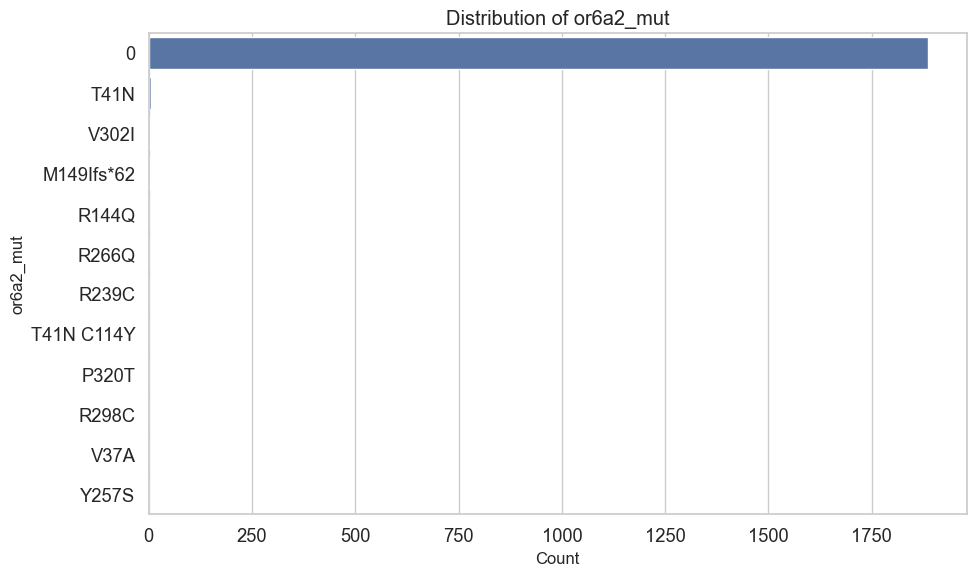


Unique values in 'map3k13_mut':


,Count,Percentage
map3k13_mut,,
0,1886,99.05
R837L,1,0.05
L925V,1,0.05
R880C,1,0.05
F120I,1,0.05
I194M D601N,1,0.05
R478Q,1,0.05
S901L,1,0.05
Q5E,1,0.05



Unique values in 'hdac9_mut':


,Count,Percentage
hdac9_mut,,
0,1886,99.05
L985R,1,0.05
A584V,1,0.05
T426A,1,0.05
S273A S276T,1,0.05
A636T,1,0.05
R947H,1,0.05
P296S,1,0.05
V647I,1,0.05



Unique values in 'prkacg_mut':


,Count,Percentage
prkacg_mut,,
0,1887,99.11
A207V,2,0.11
A6D,1,0.05
F186L,1,0.05
A154D,1,0.05
F130Y,1,0.05
D42V,1,0.05
P238S,1,0.05
R337W,1,0.05



Unique values in 'rpgr_mut':


,Count,Percentage
rpgr_mut,,
0,1887,99.11
T51=,2,0.11
G113V,1,0.05
V49I,1,0.05
D158N,1,0.05
G325R,1,0.05
R413G,1,0.05
A83T,1,0.05
T383A,1,0.05



Unique values in 'large1_mut':


,Count,Percentage
large1_mut,,
0,1888,99.16
D441N,2,0.11
T631M,2,0.11
R577S,1,0.05
E63K,1,0.05
R450H,1,0.05
R414P,1,0.05
D584N,1,0.05
V40A,1,0.05


Successfully saved: categorical_large1_mut.png


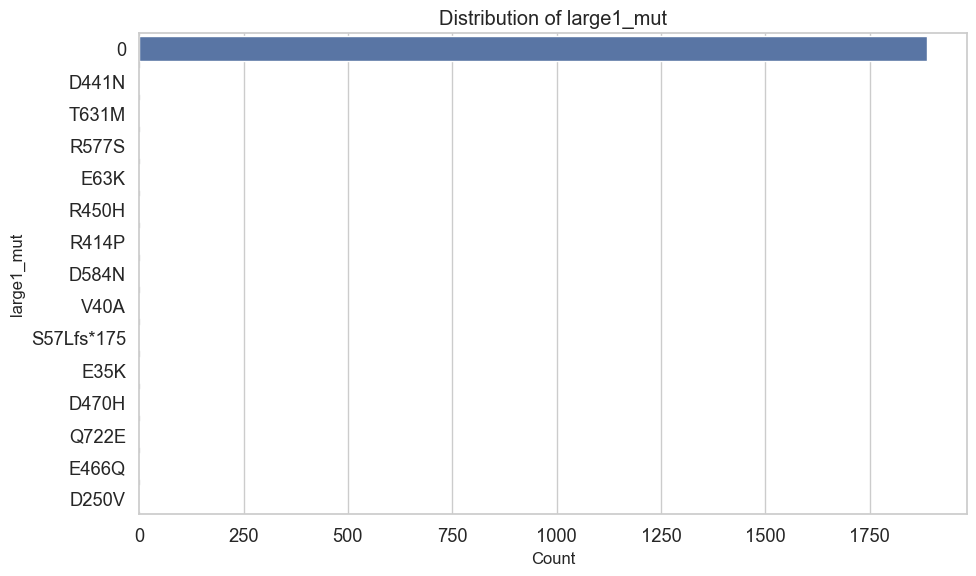


Unique values in 'foxp1_mut':


,Count,Percentage
foxp1_mut,,
0,1888,99.16
S37T,1,0.05
Q182*,1,0.05
A54T,1,0.05
E538K,1,0.05
Q208*,1,0.05
R503*,1,0.05
S290N,1,0.05
Q157*,1,0.05



Unique values in 'clk3_mut':


,Count,Percentage
clk3_mut,,
0,1890,99.26
R241W,1,0.05
E514Q,1,0.05
R420K,1,0.05
E221K,1,0.05
Y205C,1,0.05
D372H,1,0.05
L623R,1,0.05
E137Gfs*17,1,0.05


Successfully saved: categorical_clk3_mut.png


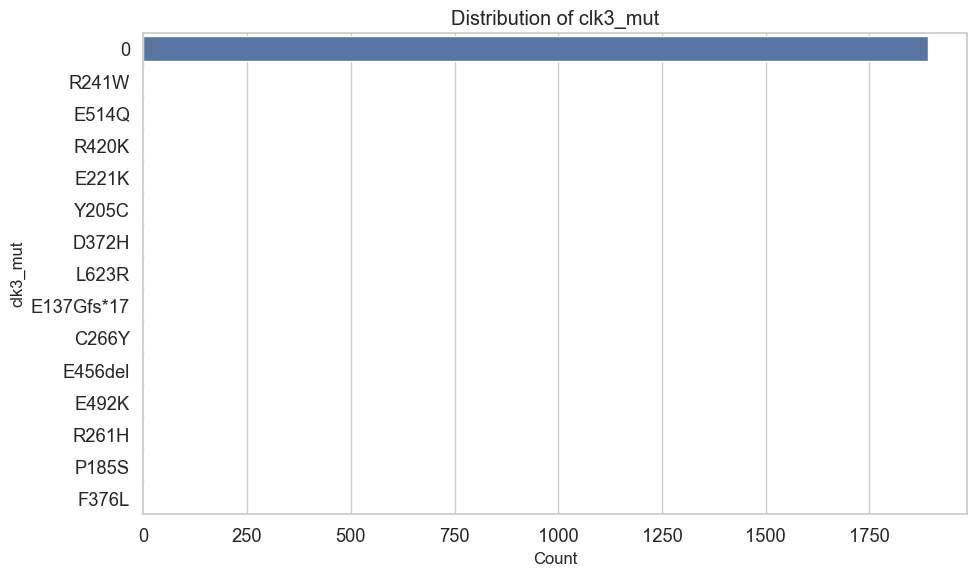


Unique values in 'prkcz_mut':


,Count,Percentage
prkcz_mut,,
0,1890,99.26
R49C,2,0.11
R137H,1,0.05
E590K,1,0.05
R137S,1,0.05
R84C,1,0.05
G118E,1,0.05
E207K,1,0.05
D524N,1,0.05


Successfully saved: categorical_prkcz_mut.png


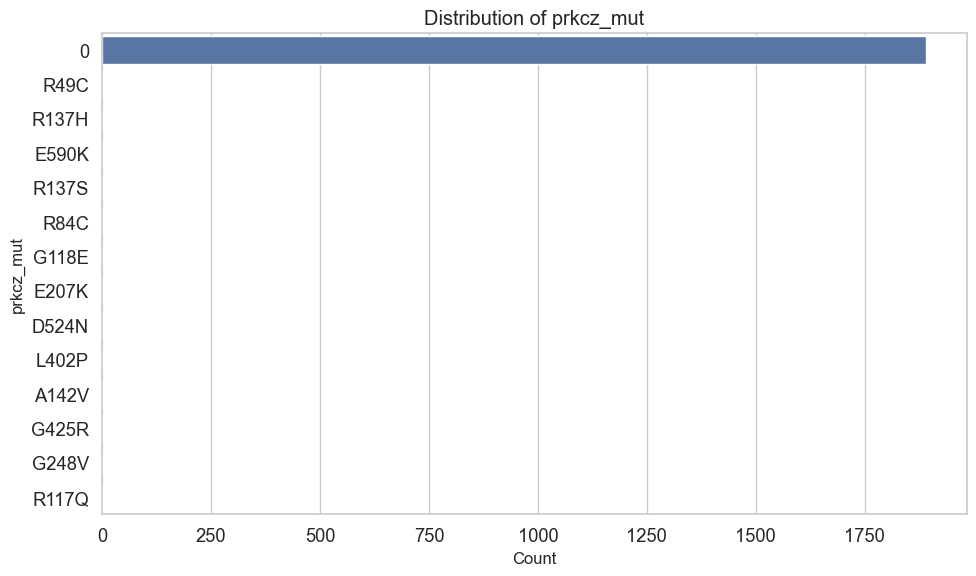


Unique values in 'lipi_mut':


,Count,Percentage
lipi_mut,,
0,1890,99.26
T304I,4,0.21
D301Y,1,0.05
S156G,1,0.05
V98I,1,0.05
T222M,1,0.05
V366G,1,0.05
T287R,1,0.05
Q20H,1,0.05


Successfully saved: categorical_lipi_mut.png


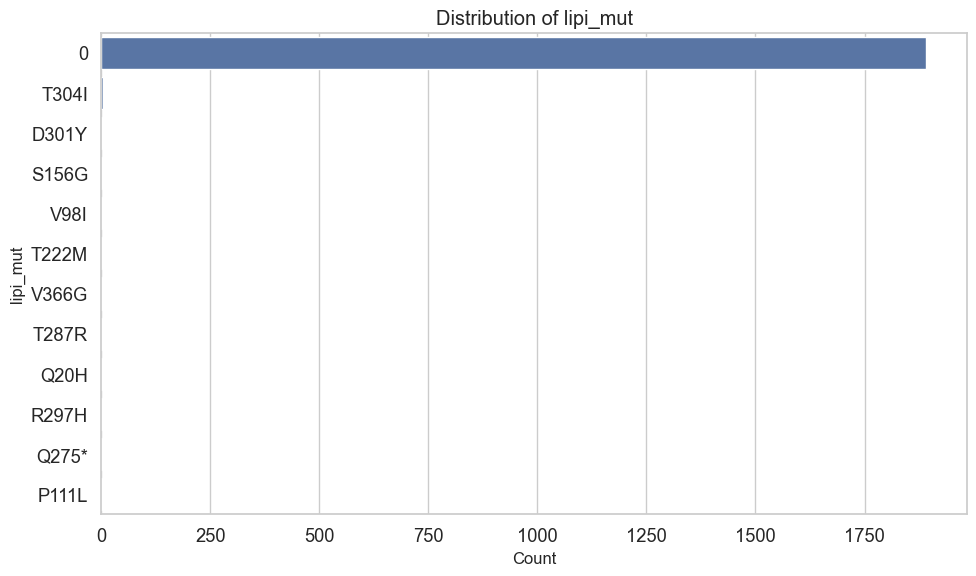


Unique values in 'ppp2r2a_mut':


,Count,Percentage
ppp2r2a_mut,,
0,1891,99.32
N386S,2,0.11
D406E,1,0.05
R303G,1,0.05
R298Q,1,0.05
R142S,1,0.05
E83Rfs*3,1,0.05
Y305Lfs*23,1,0.05
S15Lfs*3,1,0.05


Successfully saved: categorical_ppp2r2a_mut.png


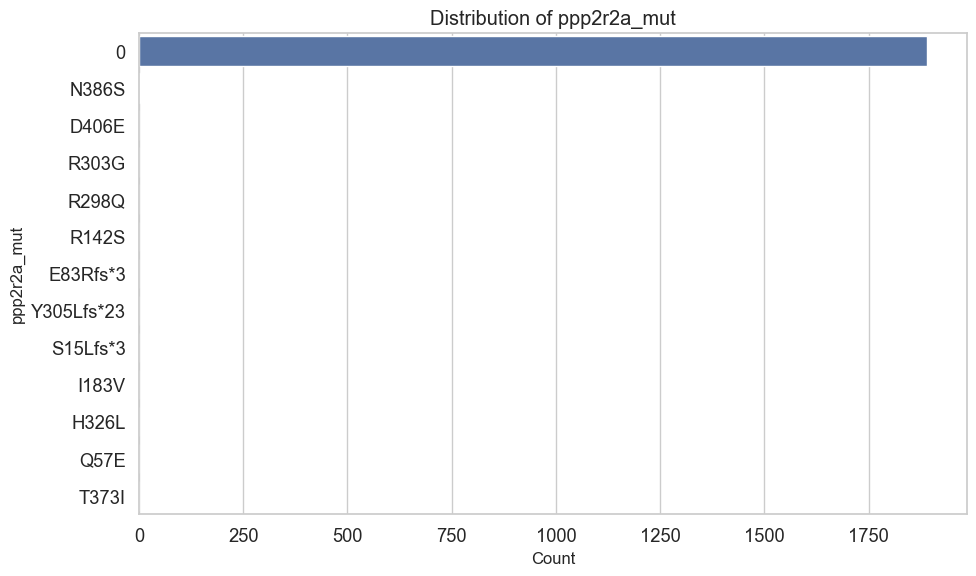


Unique values in 'prkce_mut':


,Count,Percentage
prkce_mut,,
0,1891,99.32
E341K,1,0.05
D505N,1,0.05
K301R,1,0.05
Y584H,1,0.05
D431H,1,0.05
R282H,1,0.05
K457N,1,0.05
I51M,1,0.05


Successfully saved: categorical_prkce_mut.png


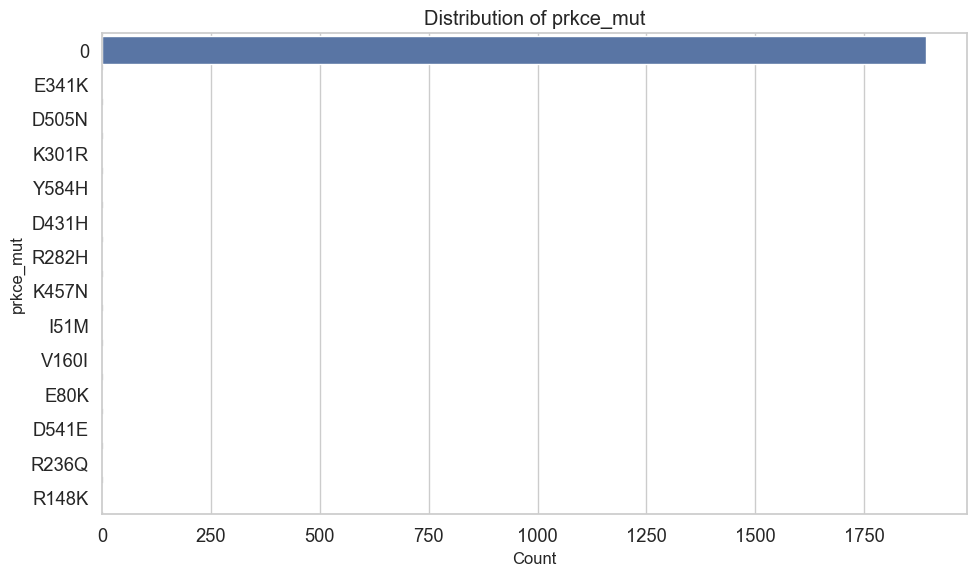


Unique values in 'gh1_mut':


,Count,Percentage
gh1_mut,,
0,1892,99.37
K96E,1,0.05
L150Q,1,0.05
A2T,1,0.05
Q110E,1,0.05
E65D,1,0.05
Y190H,1,0.05
A39T,1,0.05
G157D,1,0.05


Successfully saved: categorical_gh1_mut.png


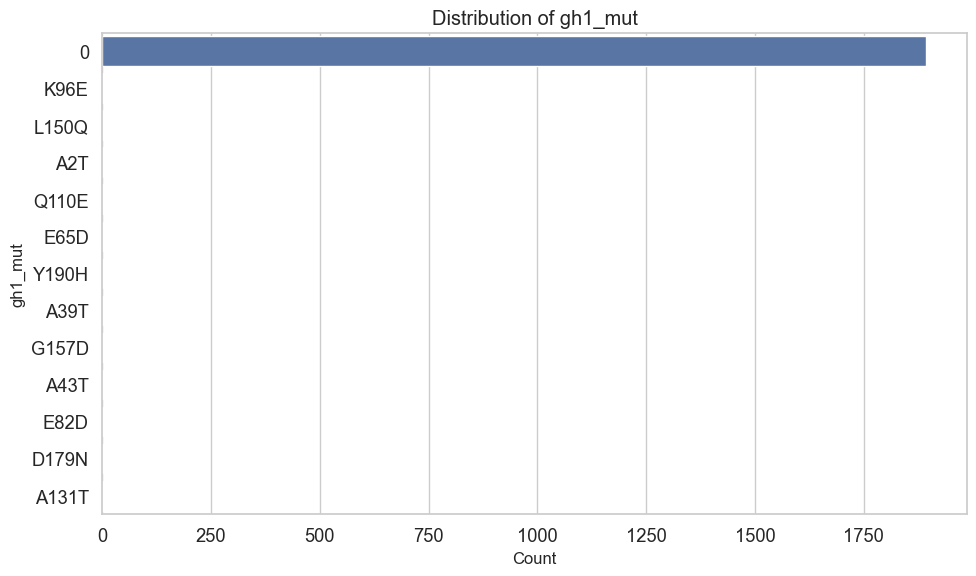


Unique values in 'gpr32_mut':


,Count,Percentage
gpr32_mut,,
0,1892,99.37
S32F,2,0.11
W107C,2,0.11
D88G,1,0.05
G110R,1,0.05
A230E,1,0.05
S174A,1,0.05
S309N S310C,1,0.05
N30S,1,0.05


Successfully saved: categorical_gpr32_mut.png


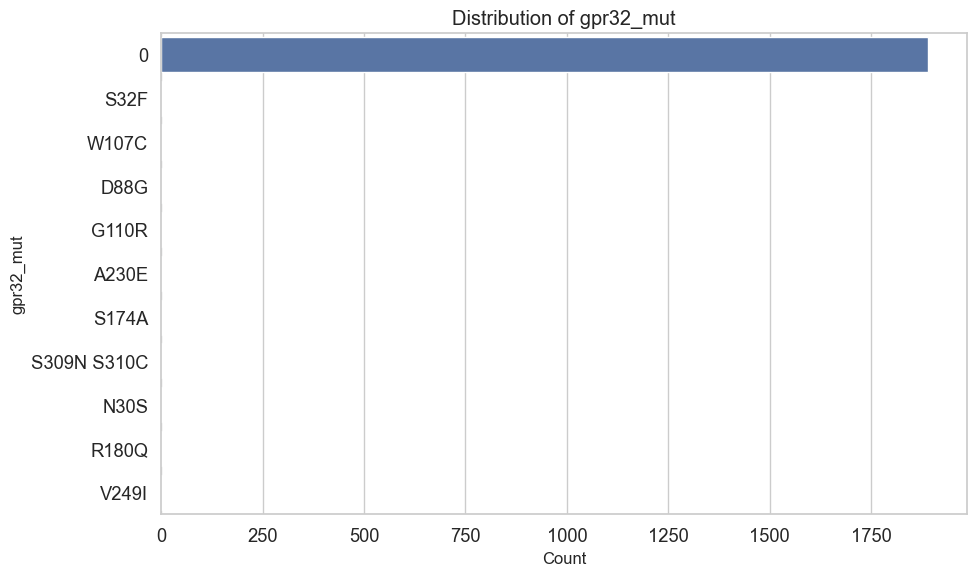


Unique values in 'kras_mut':


,Count,Percentage
kras_mut,,
0,1892,99.37
G12V,3,0.16
G12C,2,0.11
G12A,2,0.11
G12D,2,0.11
G12S,1,0.05
R167T,1,0.05
A59T,1,0.05


Successfully saved: categorical_kras_mut.png


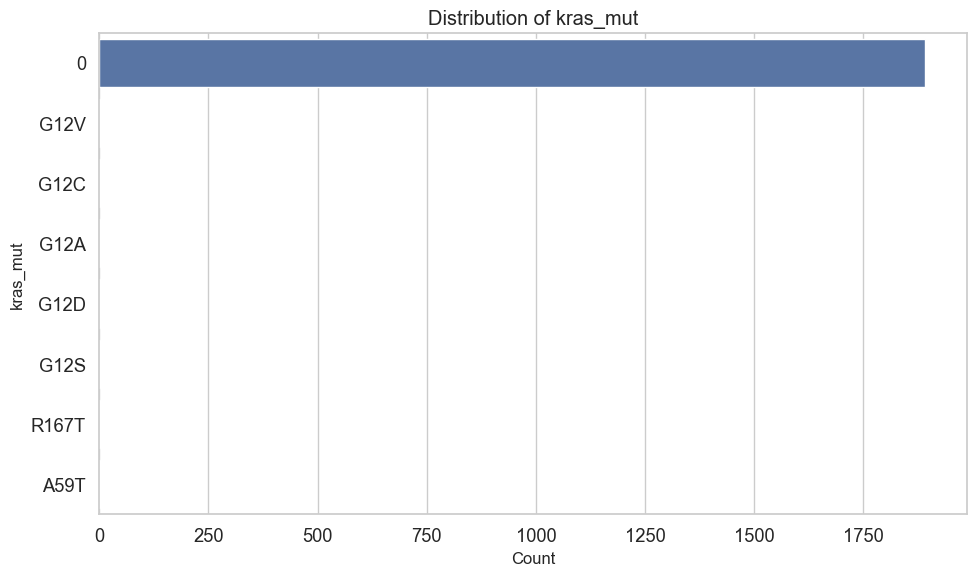


Unique values in 'nf2_mut':


,Count,Percentage
nf2_mut,,
0,1892,99.37
E393K,1,0.05
Q125Dfs*6,1,0.05
R198*,1,0.05
A416V,1,0.05
E564del,1,0.05
H116R,1,0.05
R411H,1,0.05
A142D,1,0.05


Successfully saved: categorical_nf2_mut.png


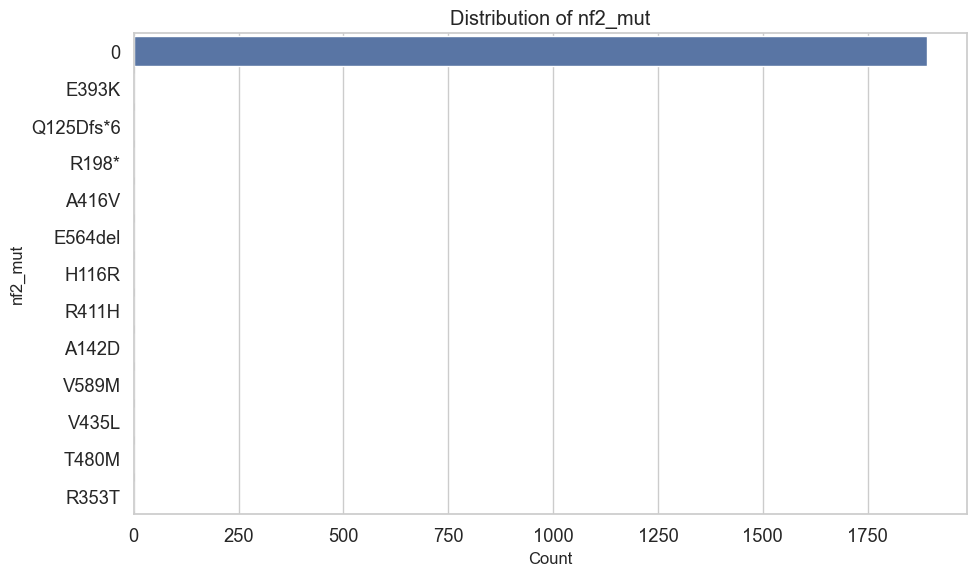


Unique values in 'chek2_mut':


,Count,Percentage
chek2_mut,,
0,1892,99.37
G259Wfs*13,1,0.05
W97*,1,0.05
K197E,1,0.05
D77N,1,0.05
W485*,1,0.05
I364T,1,0.05
R346H,1,0.05
N105K,1,0.05


Successfully saved: categorical_chek2_mut.png


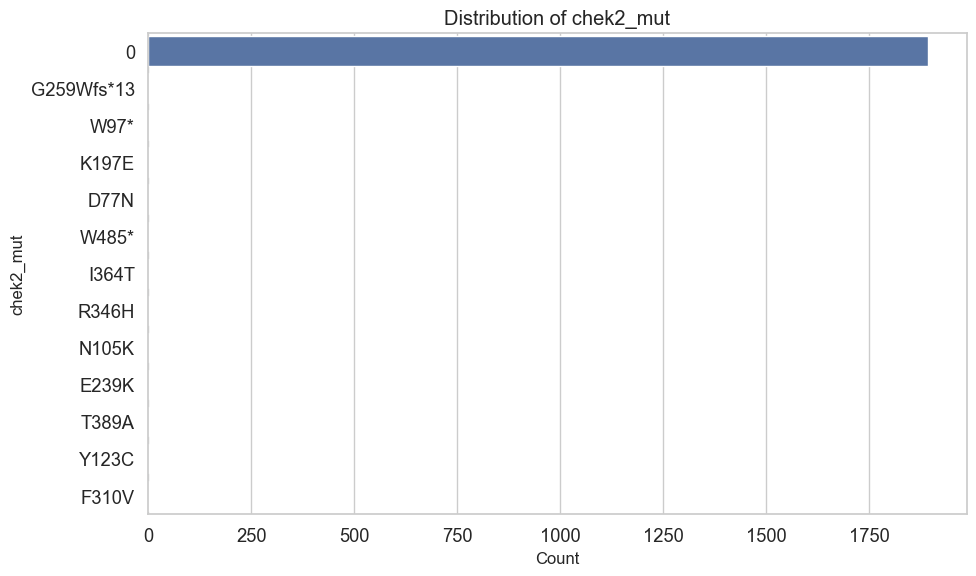


Unique values in 'ldlrap1_mut':


,Count,Percentage
ldlrap1_mut,,
0,1892,99.37
A284T,2,0.11
V271I,2,0.11
D303N,2,0.11
N138S,1,0.05
I108V,1,0.05
A69T,1,0.05
R151W,1,0.05
R196H,1,0.05


Successfully saved: categorical_ldlrap1_mut.png


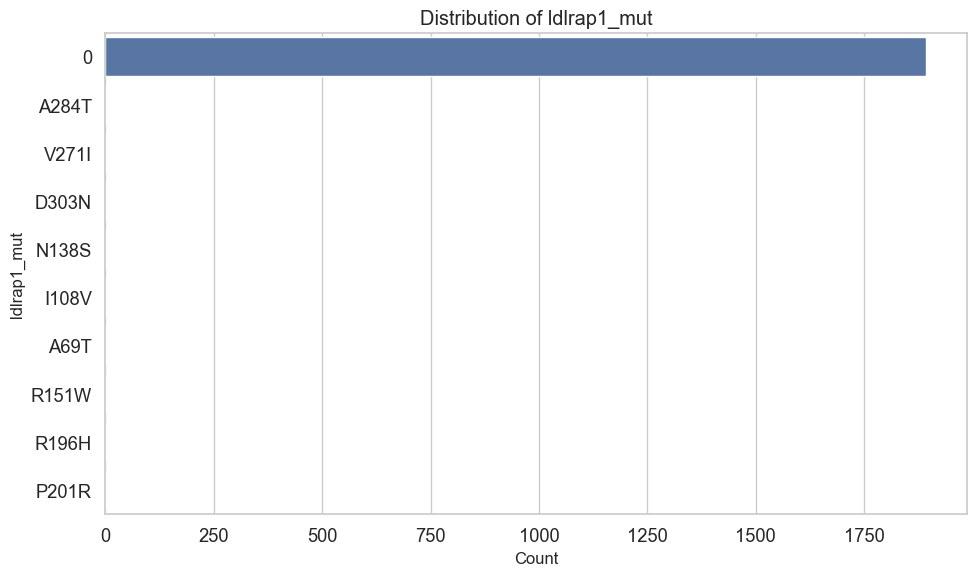


Unique values in 'clrn2_mut':


,Count,Percentage
clrn2_mut,,
0,1892,99.37
A144T,2,0.11
C69Y,2,0.11
H199L,1,0.05
K7N,1,0.05
A207V,1,0.05
R67Q,1,0.05
E222K,1,0.05
I124N,1,0.05


Successfully saved: categorical_clrn2_mut.png


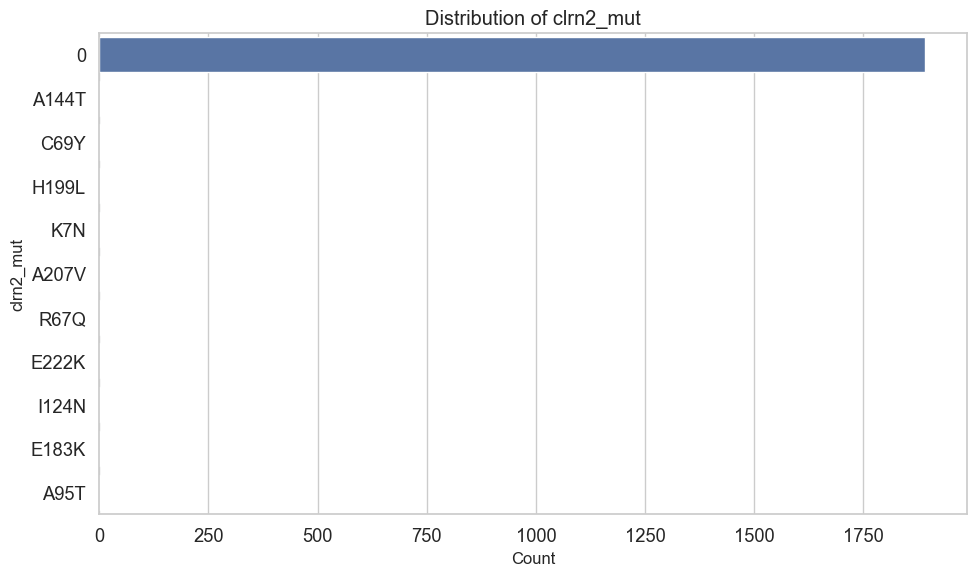


Unique values in 'acvrl1_mut':


,Count,Percentage
acvrl1_mut,,
0,1893,99.42
I417F,2,0.11
R200W,1,0.05
C51*,1,0.05
D360N,1,0.05
V442L,1,0.05
G114A,1,0.05
G283S,1,0.05
R28W,1,0.05


Successfully saved: categorical_acvrl1_mut.png


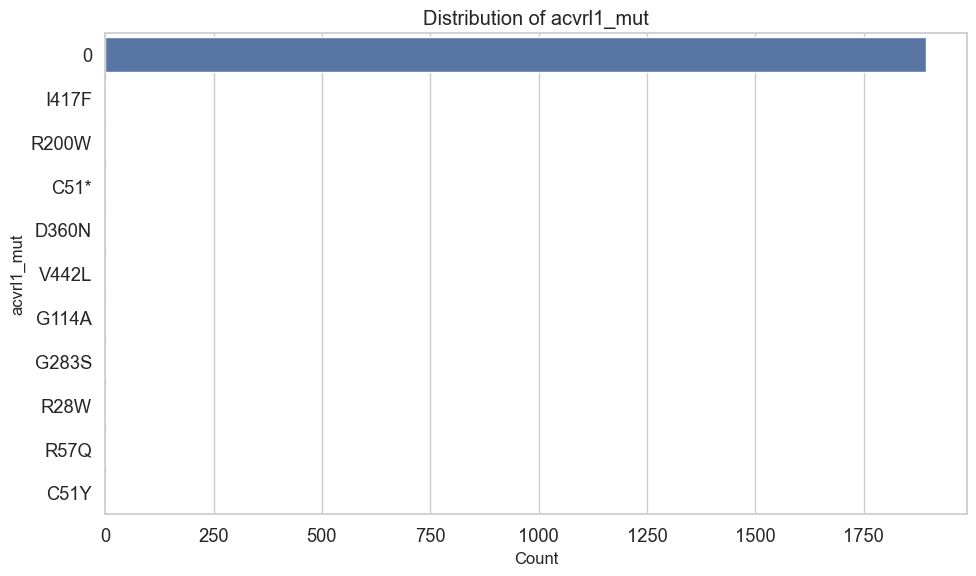


Unique values in 'agtr2_mut':


,Count,Percentage
agtr2_mut,,
0,1893,99.42
P271L,5,0.26
F272L,2,0.11
V23M,2,0.11
G113V,1,0.05
F134L,1,0.05


Successfully saved: categorical_agtr2_mut.png


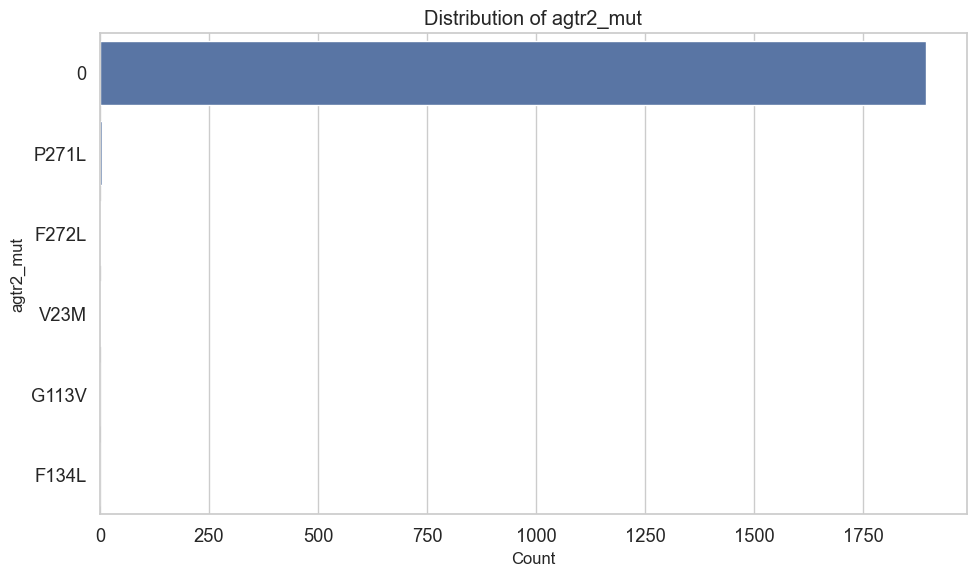


Unique values in 'cdkn2a_mut':


,Count,Percentage
cdkn2a_mut,,
0,1893,99.42
H83Y,2,0.11
R80*,2,0.11
S12*,1,0.05
R22Q,1,0.05
L113V,1,0.05
Y44Tfs*9,1,0.05
V115E,1,0.05
E119K R138K,1,0.05


Successfully saved: categorical_cdkn2a_mut.png


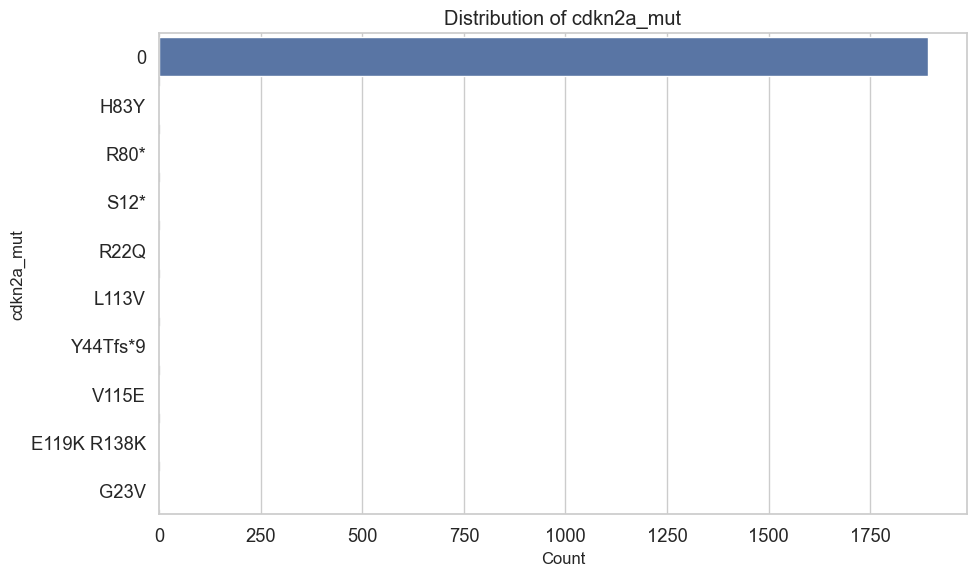


Unique values in 'ctnna1_mut':


,Count,Percentage
ctnna1_mut,,
0,1893,99.42
D114H,1,0.05
X101_splice,1,0.05
Q887*,1,0.05
A885V,1,0.05
P462L,1,0.05
D904A,1,0.05
R300C,1,0.05
R586C,1,0.05


Successfully saved: categorical_ctnna1_mut.png


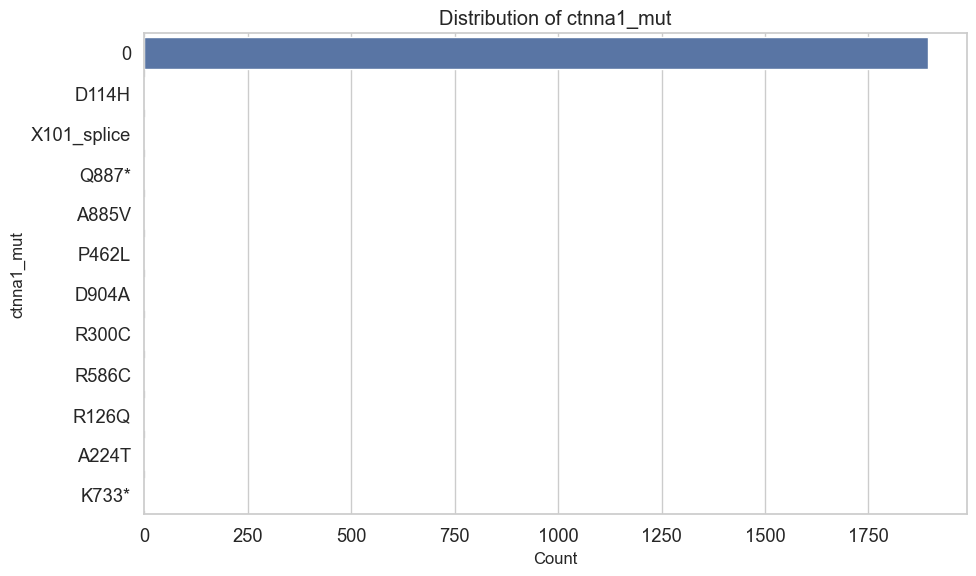


Unique values in 'magea8_mut':


,Count,Percentage
magea8_mut,,
0,1893,99.42
L139F,2,0.11
A68V,2,0.11
A264V,2,0.11
E114K,1,0.05
K11Q,1,0.05
L213F,1,0.05
R279T,1,0.05
I164N,1,0.05


Successfully saved: categorical_magea8_mut.png


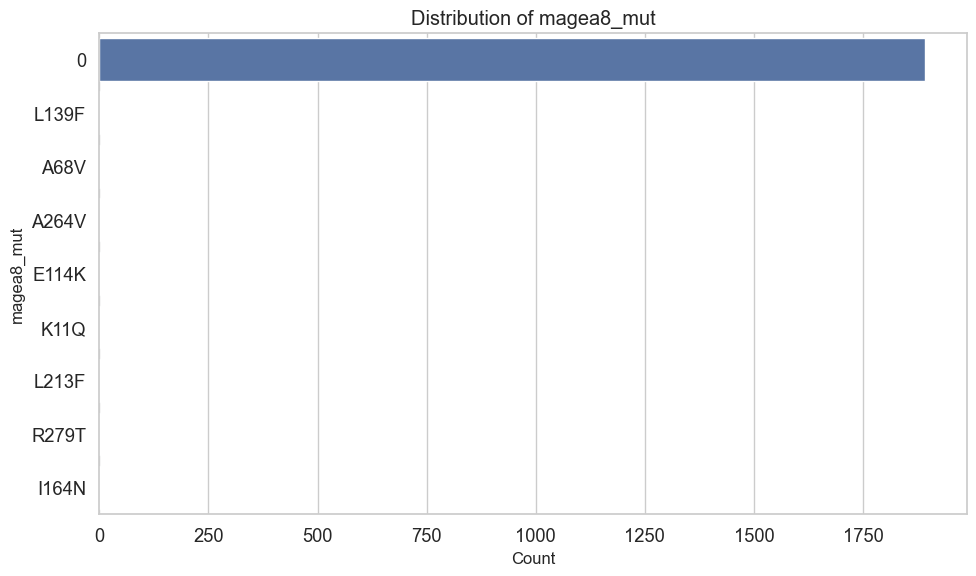


Unique values in 'prr16_mut':


,Count,Percentage
prr16_mut,,
0,1893,99.42
E28*,1,0.05
N156K,1,0.05
N273S,1,0.05
P125H,1,0.05
T294M,1,0.05
P276S,1,0.05
L51R,1,0.05
L117P,1,0.05


Successfully saved: categorical_prr16_mut.png


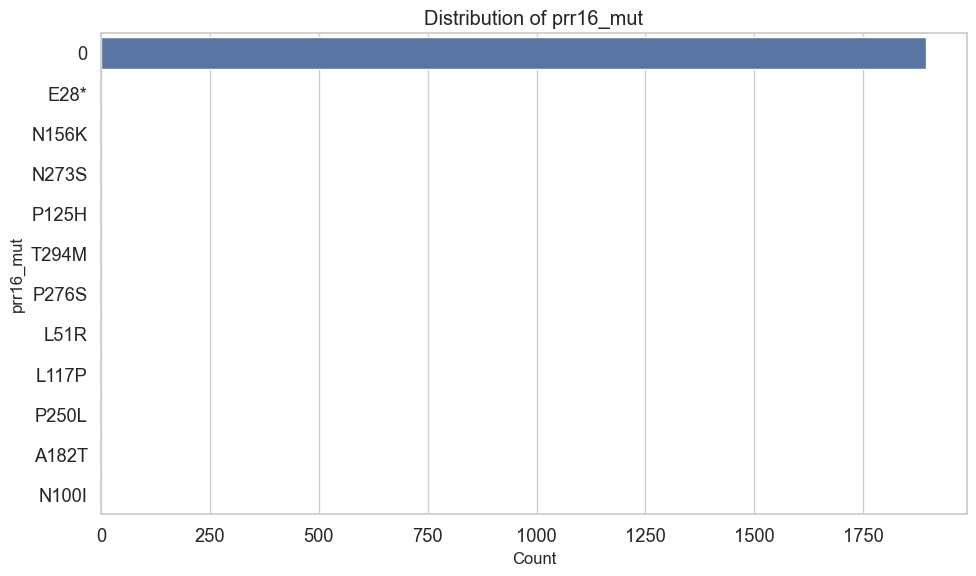


Unique values in 'dtwd2_mut':


,Count,Percentage
dtwd2_mut,,
0,1893,99.42
P67R,2,0.11
R31W,1,0.05
A42V,1,0.05
R263H,1,0.05
R246C,1,0.05
A15T,1,0.05
R109H,1,0.05
R195*,1,0.05


Successfully saved: categorical_dtwd2_mut.png


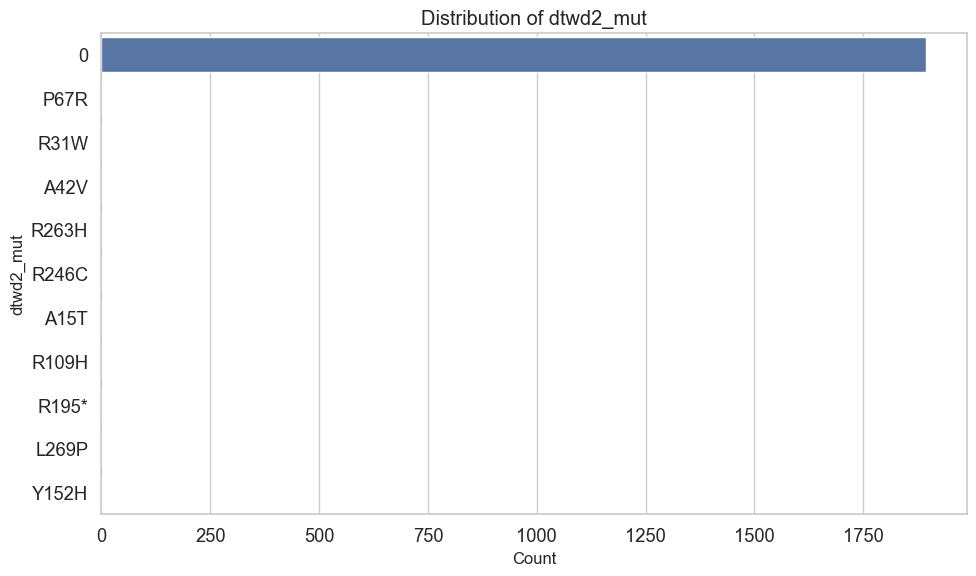


Unique values in 'akt2_mut':


,Count,Percentage
akt2_mut,,
0,1894,99.47
Q391H,2,0.11
G159C,1,0.05
E43D,1,0.05
R170W,1,0.05
R269Q,1,0.05
H469Y,1,0.05
D416N,1,0.05
R253W,1,0.05


Successfully saved: categorical_akt2_mut.png


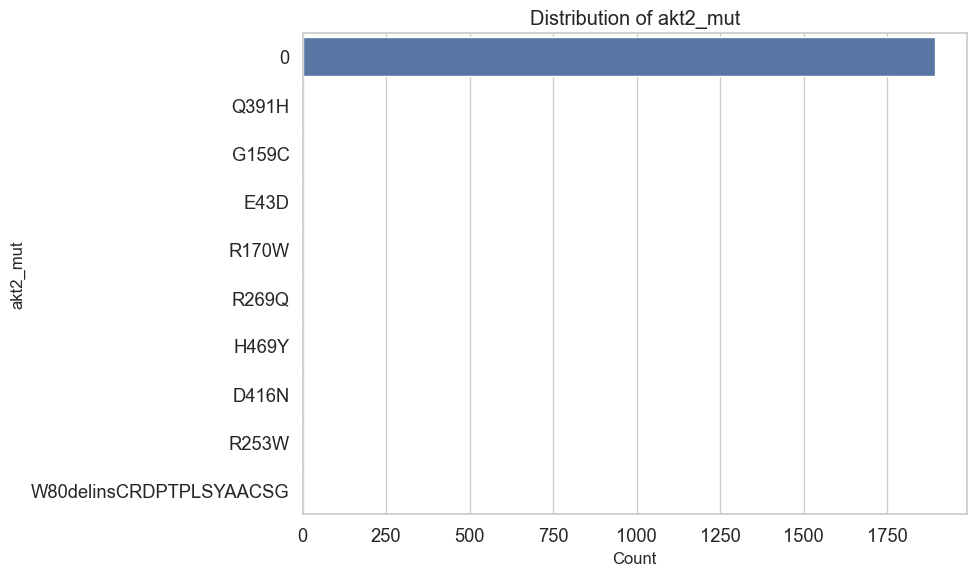


Unique values in 'braf_mut':


,Count,Percentage
braf_mut,,
0,1894,99.47
V600E,1,0.05
E695Q,1,0.05
F346L,1,0.05
Q386L,1,0.05
A320T,1,0.05
Q94E,1,0.05
S110F,1,0.05
D143G,1,0.05


Successfully saved: categorical_braf_mut.png


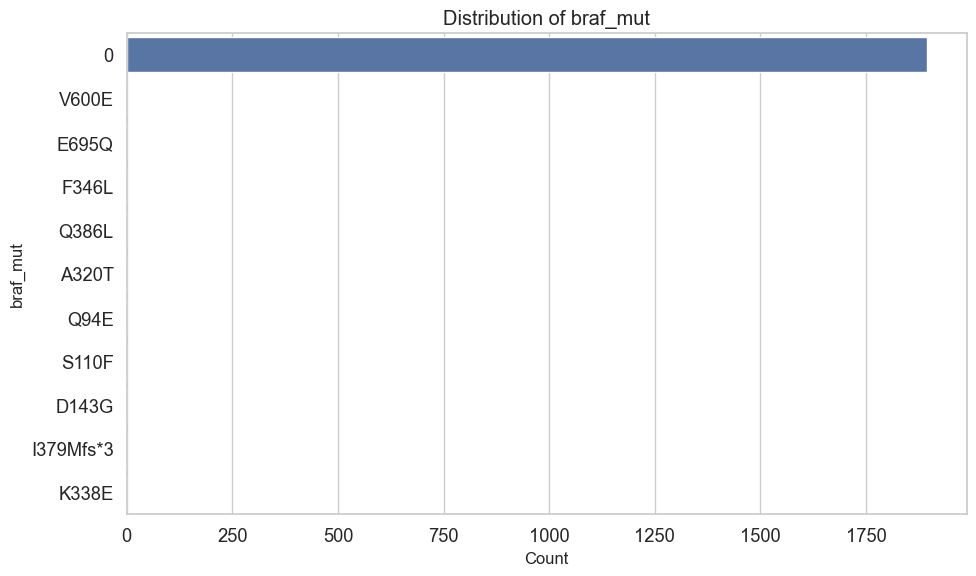


Unique values in 'foxo1_mut':


,Count,Percentage
foxo1_mut,,
0,1894,99.47
T397A,1,0.05
V347M,1,0.05
S155F,1,0.05
S322G,1,0.05
T627S,1,0.05
H220N,1,0.05
P395S,1,0.05
A48T,1,0.05


Successfully saved: categorical_foxo1_mut.png


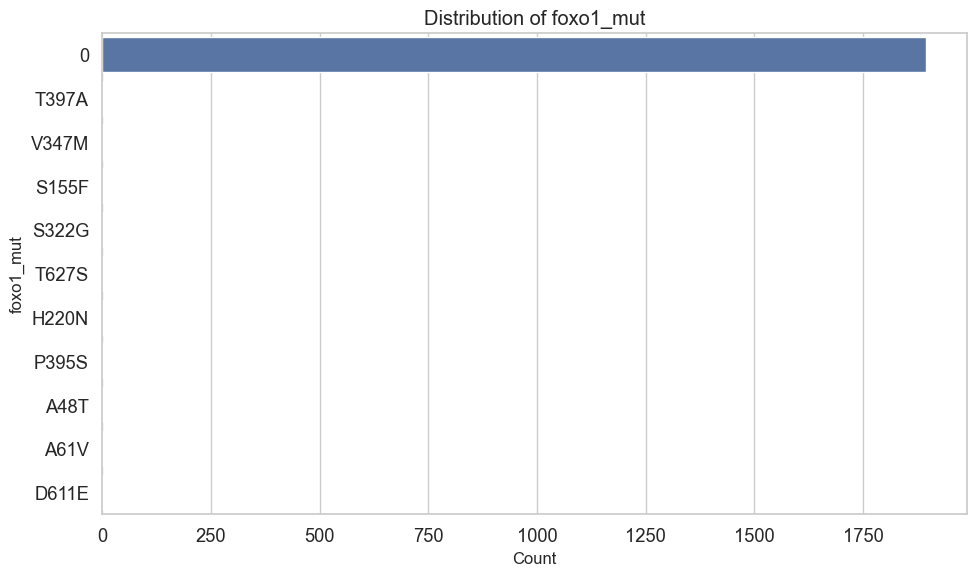


Unique values in 'nt5e_mut':


,Count,Percentage
nt5e_mut,,
0,1894,99.47
A5T,2,0.11
A567T,1,0.05
I173V,1,0.05
Q153E,1,0.05
E293Q,1,0.05
P318T,1,0.05
G453=,1,0.05
E196K,1,0.05


Successfully saved: categorical_nt5e_mut.png


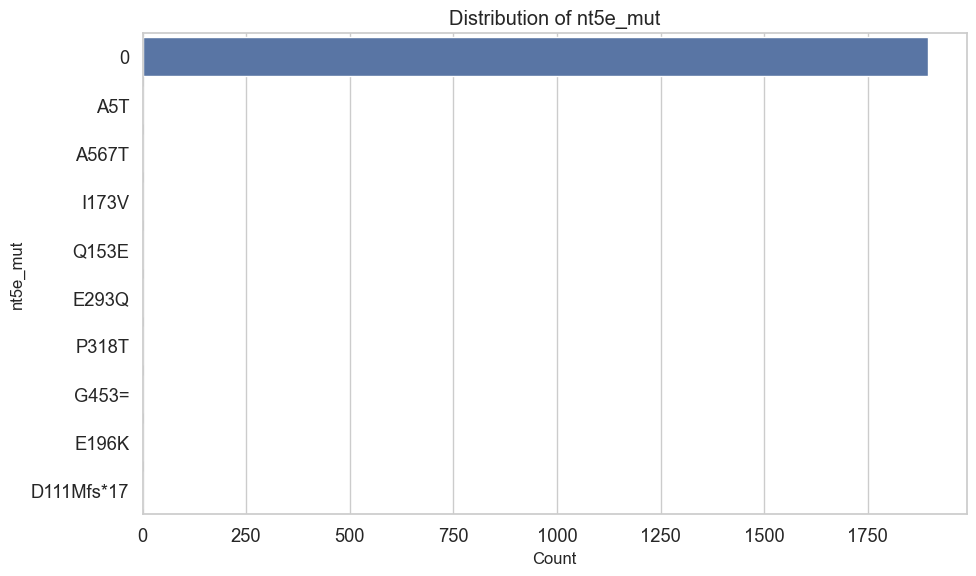


Unique values in 'ccnd3_mut':


,Count,Percentage
ccnd3_mut,,
0,1895,99.53
P17S,1,0.05
I208T,1,0.05
Q260*,1,0.05
E122G,1,0.05
S169F,1,0.05
R33G,1,0.05
Q25E,1,0.05
T184N,1,0.05


Successfully saved: categorical_ccnd3_mut.png


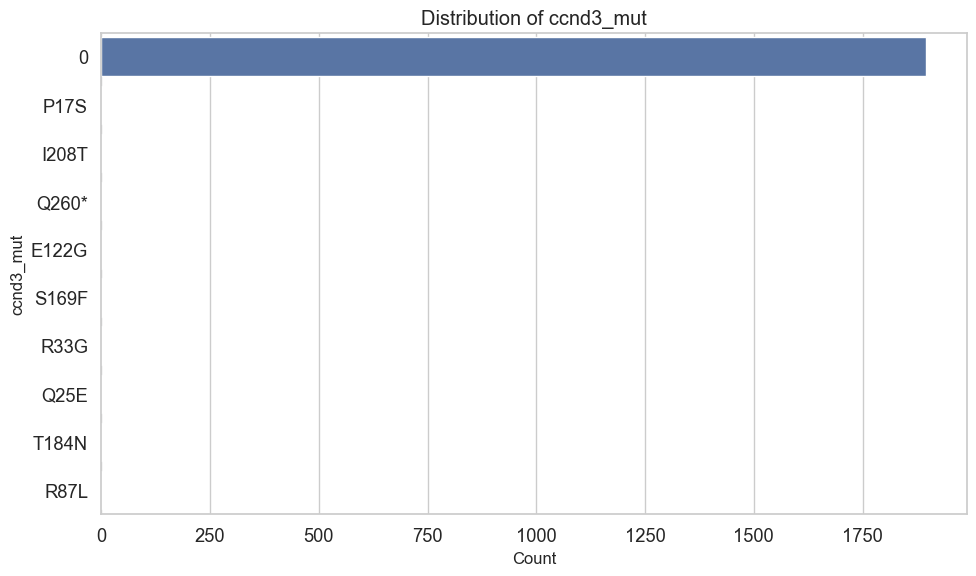


Unique values in 'nr3c1_mut':


,Count,Percentage
nr3c1_mut,,
0,1895,99.53
S269R,1,0.05
Q74R,1,0.05
T504S,1,0.05
E730K,1,0.05
L78P,1,0.05
F29L,1,0.05
Y545C,1,0.05
E362K,1,0.05


Successfully saved: categorical_nr3c1_mut.png


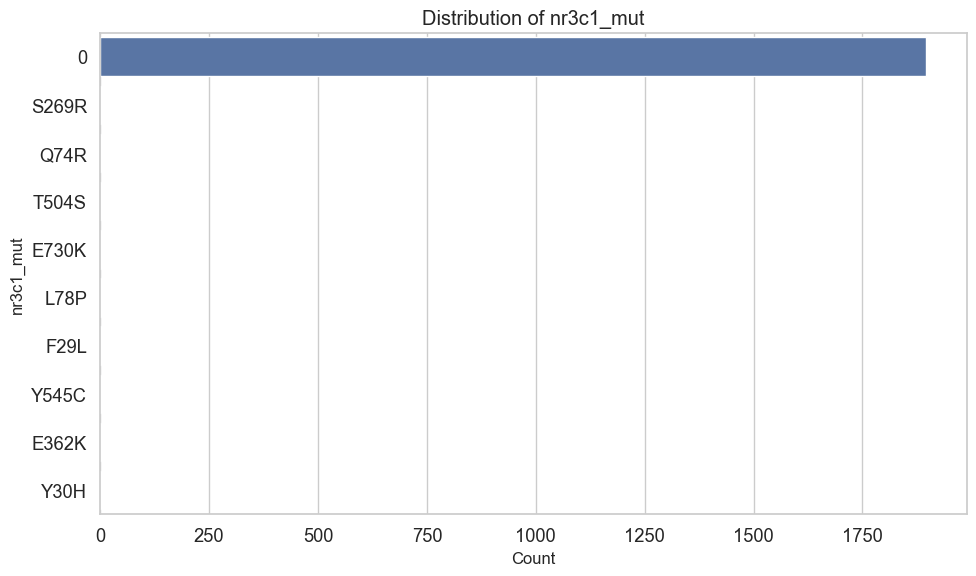


Unique values in 'prkg1_mut':


,Count,Percentage
prkg1_mut,,
0,1895,99.53
R483Q,2,0.11
S396L,1,0.05
V362A,1,0.05
E227Q,1,0.05
E328K,1,0.05
T192A,1,0.05
A337V,1,0.05
A341T,1,0.05


Successfully saved: categorical_prkg1_mut.png


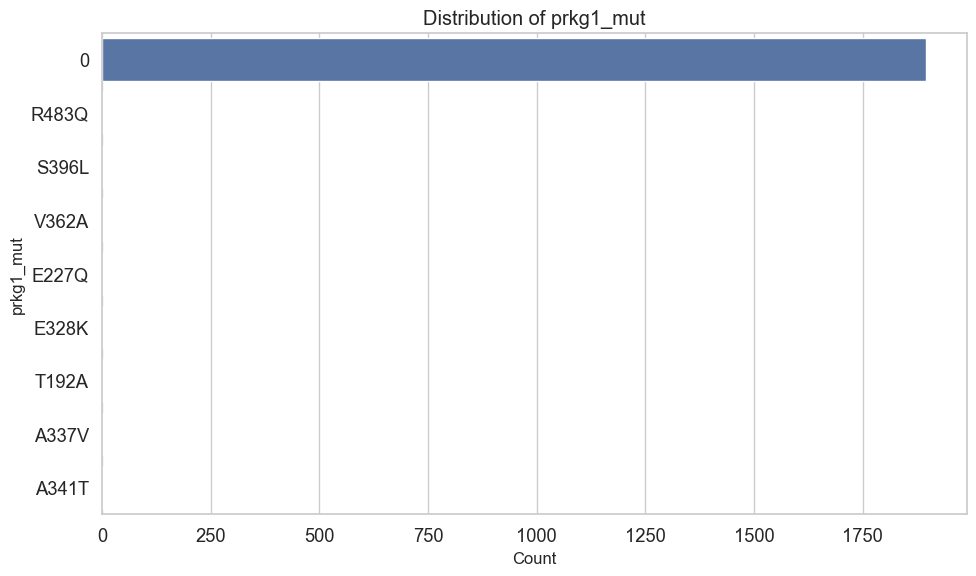


Unique values in 'tbl1xr1_mut':


,Count,Percentage
tbl1xr1_mut,,
0,1896,99.58
C175W,1,0.05
D190Y,1,0.05
S326N,1,0.05
K379Hfs*27,1,0.05
S119N,1,0.05
X68_splice,1,0.05
D369Y,1,0.05
X256_splice,1,0.05


Successfully saved: categorical_tbl1xr1_mut.png


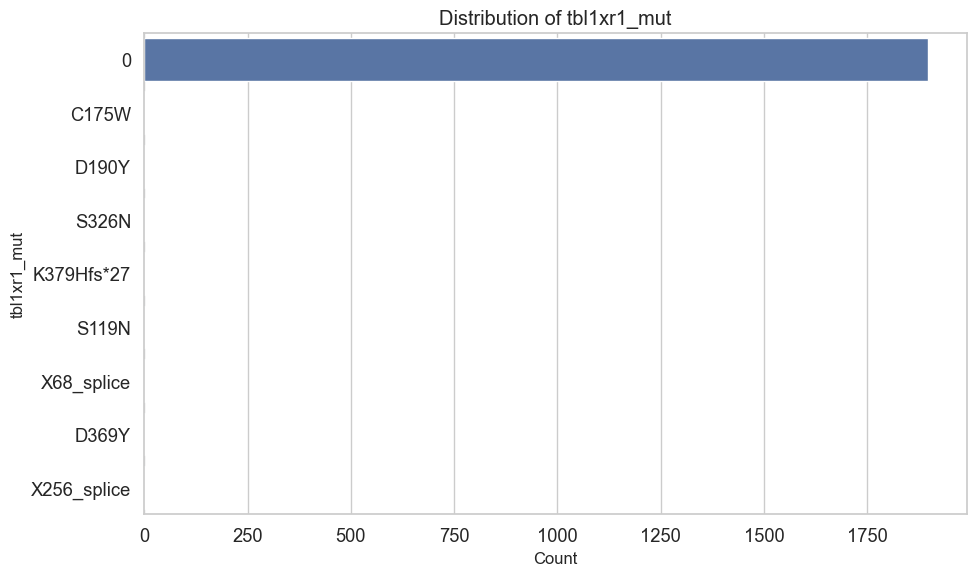


Unique values in 'frmd3_mut':


,Count,Percentage
frmd3_mut,,
0,1896,99.58
S183L,1,0.05
T565P T565K,1,0.05
P89A,1,0.05
E474Q,1,0.05
R21Gfs*12,1,0.05
T124=,1,0.05
E581D,1,0.05
R364H,1,0.05


Successfully saved: categorical_frmd3_mut.png


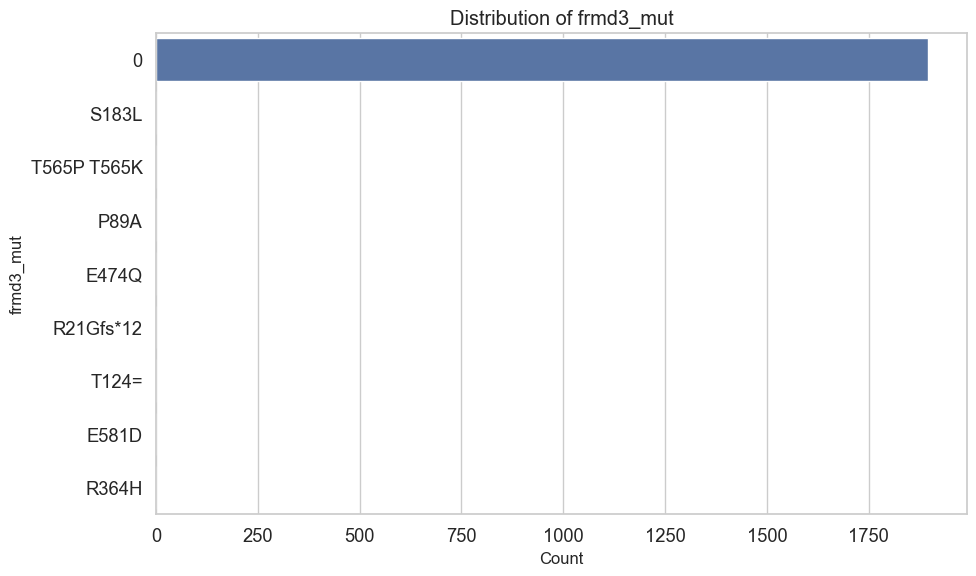


Unique values in 'smad2_mut':


,Count,Percentage
smad2_mut,,
0,1897,99.63
E150K,2,0.11
S2L,1,0.05
L261F,1,0.05
D59H,1,0.05
H198D,1,0.05
K19E,1,0.05


Successfully saved: categorical_smad2_mut.png


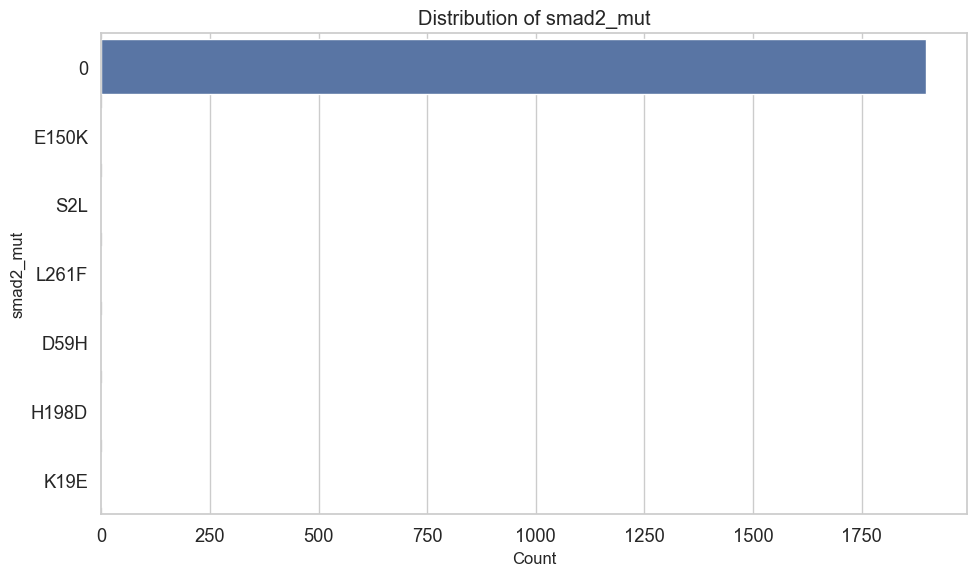


Unique values in 'sgcd_mut':


,Count,Percentage
sgcd_mut,,
0,1897,99.63
R32Q,2,0.11
T251M,1,0.05
G276R,1,0.05
A168E,1,0.05
V264I,1,0.05
Y27C,1,0.05


Successfully saved: categorical_sgcd_mut.png


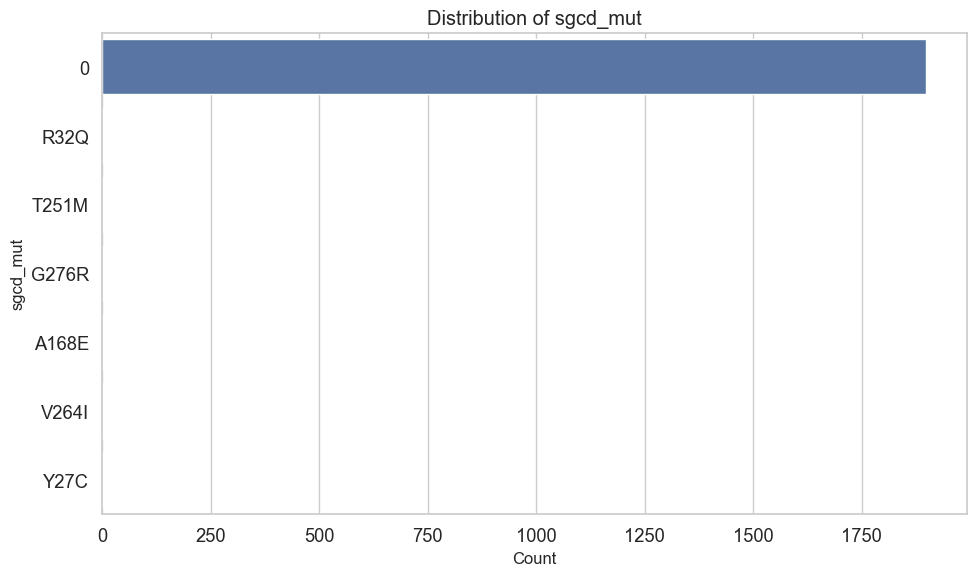


Unique values in 'spaca1_mut':


,Count,Percentage
spaca1_mut,,
0,1897,99.63
S256C,1,0.05
A42S,1,0.05
V199I,1,0.05
Q156K,1,0.05
S130N,1,0.05
C230*,1,0.05
E50G,1,0.05


Successfully saved: categorical_spaca1_mut.png


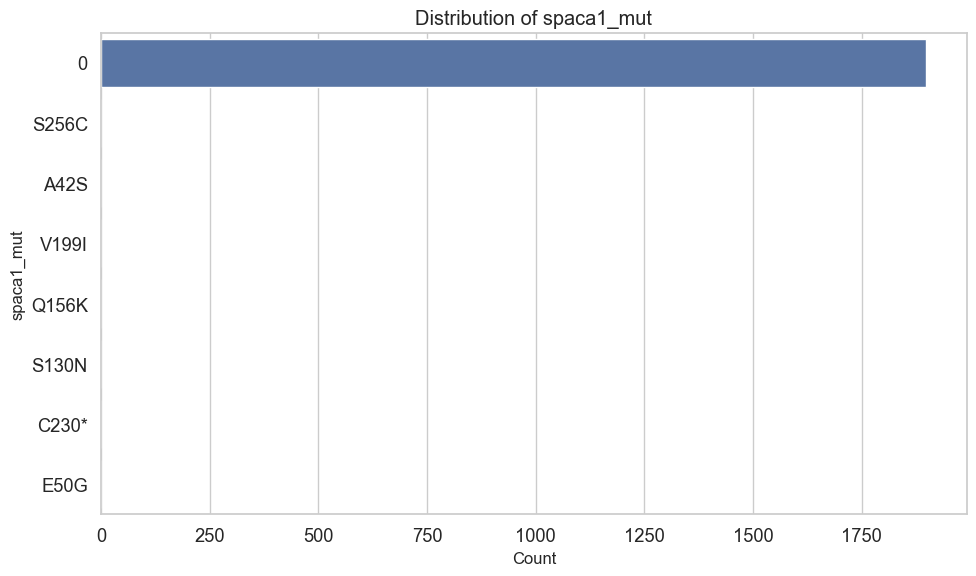


Unique values in 'rasgef1b_mut':


,Count,Percentage
rasgef1b_mut,,
0,1024,53.78
0,873,45.85
V418A,1,0.05
S343G,1,0.05
R140Q,1,0.05
X2_splice,1,0.05
R353H,1,0.05
H396Y,1,0.05
E78K,1,0.05


Successfully saved: categorical_rasgef1b_mut.png


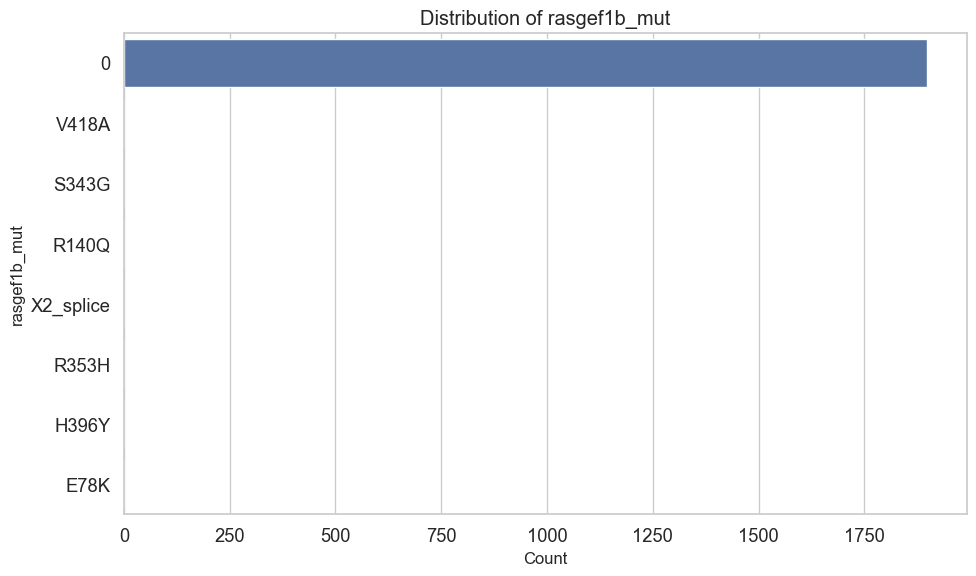


Unique values in 'hist1h2bc_mut':


,Count,Percentage
hist1h2bc_mut,,
0,1898,99.68
G27S,2,0.11
A18T,2,0.11
S7C,1,0.05
I55M,1,0.05


Successfully saved: categorical_hist1h2bc_mut.png


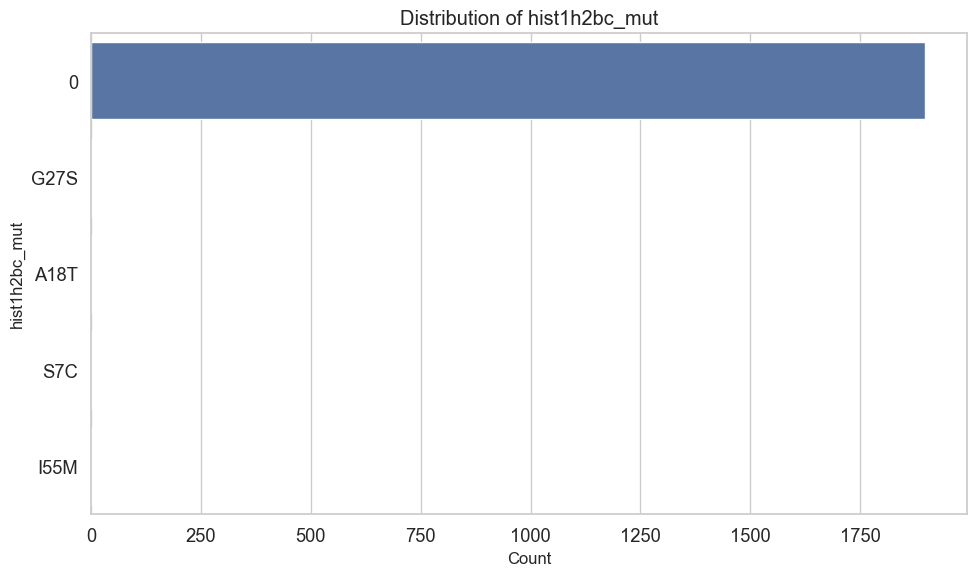


Unique values in 'nr2f1_mut':


,Count,Percentage
nr2f1_mut,,
0,1899,99.74
R225C,1,0.05
T329M,1,0.05
D91E,1,0.05
Q43del,1,0.05
L251Q,1,0.05


Successfully saved: categorical_nr2f1_mut.png


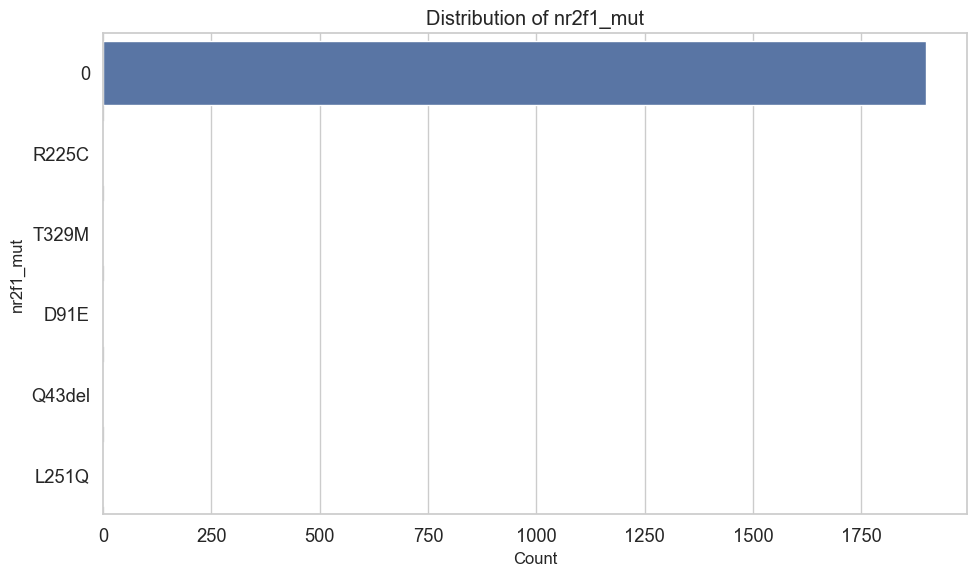


Unique values in 'klrg1_mut':


,Count,Percentage
klrg1_mut,,
0,1899,99.74
C75F,1,0.05
X186_splice,1,0.05
C176Y,1,0.05
N84K,1,0.05
S31P,1,0.05


Successfully saved: categorical_klrg1_mut.png


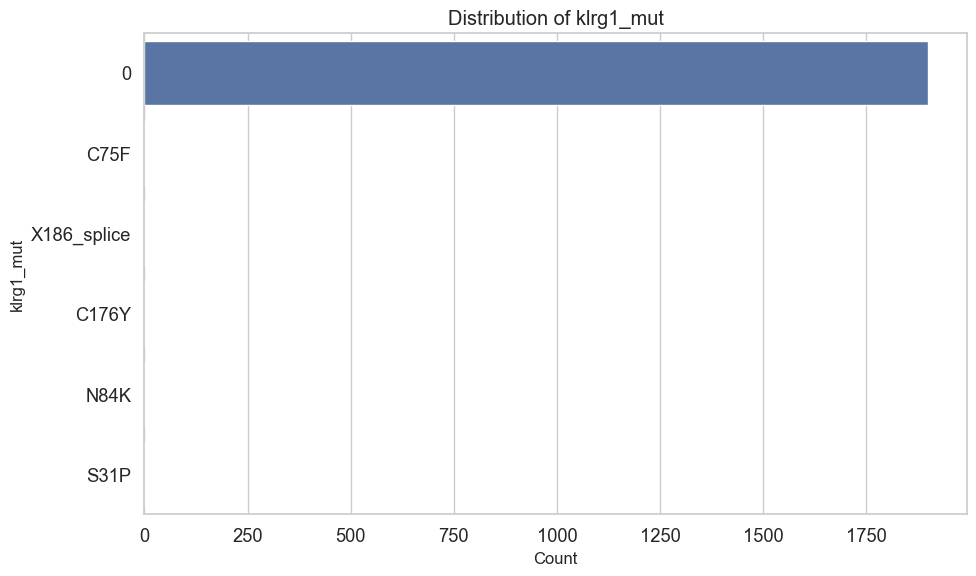


Unique values in 'mbl2_mut':


,Count,Percentage
mbl2_mut,,
0,1900,99.79
K132*,1,0.05
S85F,1,0.05
A17S,1,0.05
A120T A120E,1,0.05


Successfully saved: categorical_mbl2_mut.png


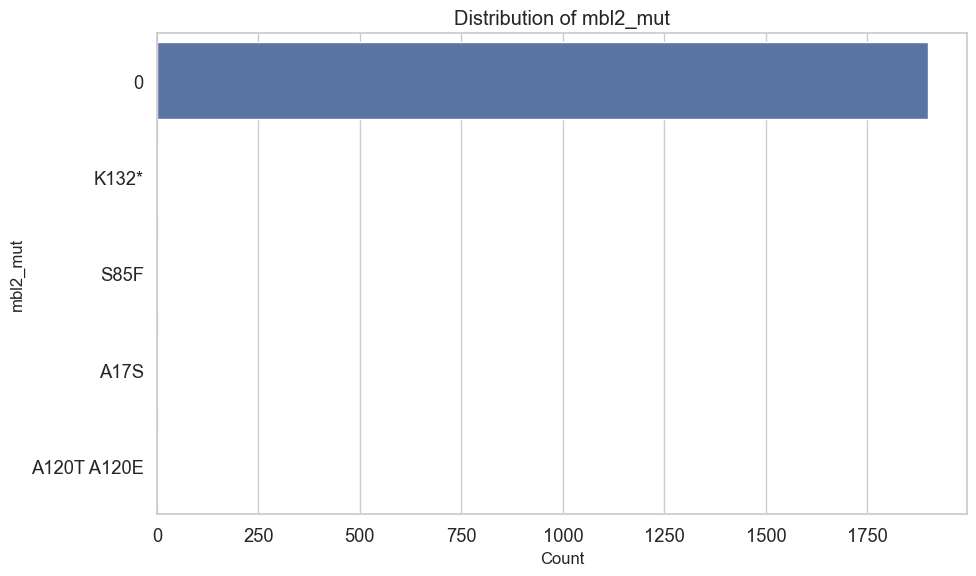


Unique values in 'mtap_mut':


,Count,Percentage
mtap_mut,,
0,1900,99.79
I255L,1,0.05
A247S,1,0.05
A213S,1,0.05
I138M,1,0.05


Successfully saved: categorical_mtap_mut.png


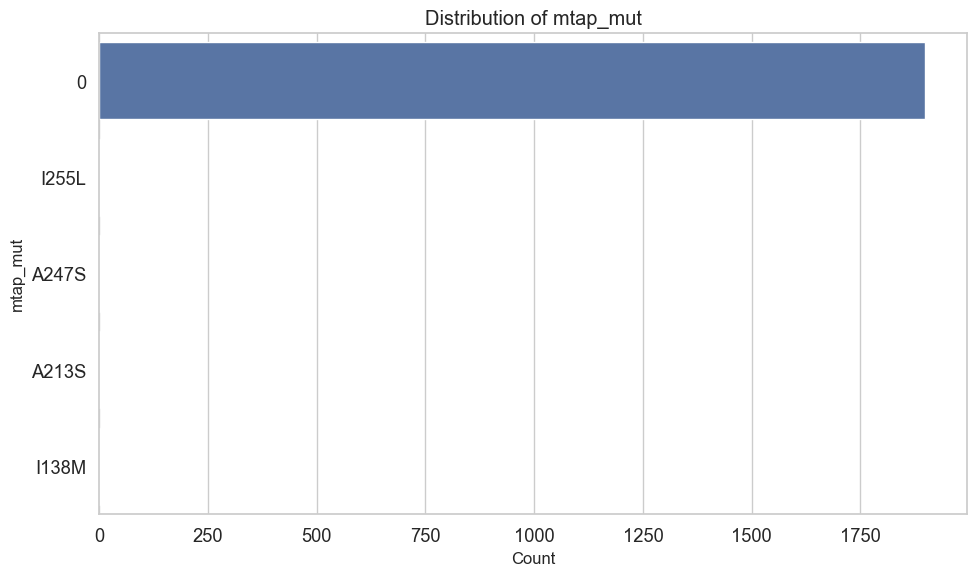


Unique values in 'ppp2cb_mut':


,Count,Percentage
ppp2cb_mut,,
0,1900,99.79
R254Q,1,0.05
I224S,1,0.05
G128V,1,0.05
R110C,1,0.05


Successfully saved: categorical_ppp2cb_mut.png


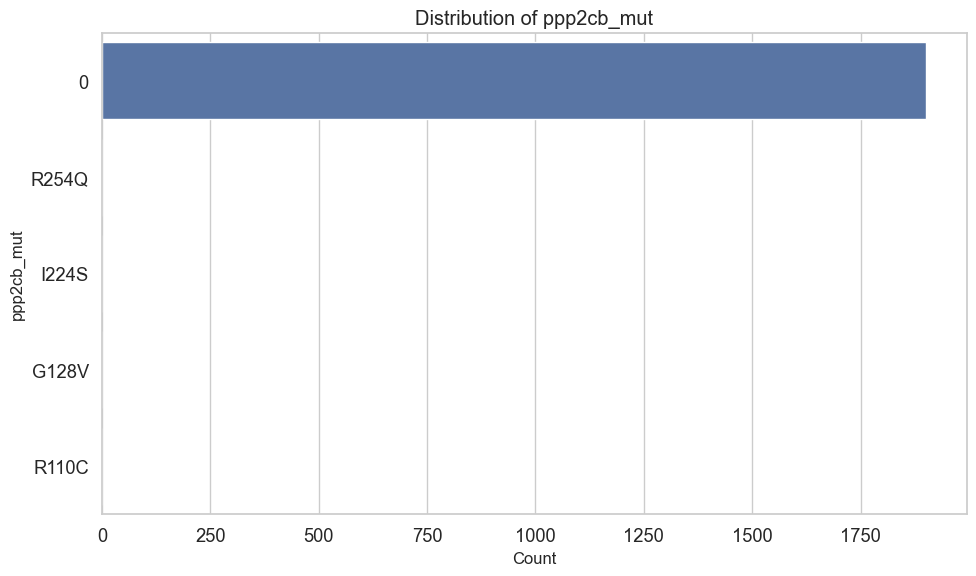


Unique values in 'smarcd1_mut':


,Count,Percentage
smarcd1_mut,,
0,1900,99.79
N84S,1,0.05
M366T,1,0.05
L434M,1,0.05
P78R,1,0.05


Successfully saved: categorical_smarcd1_mut.png


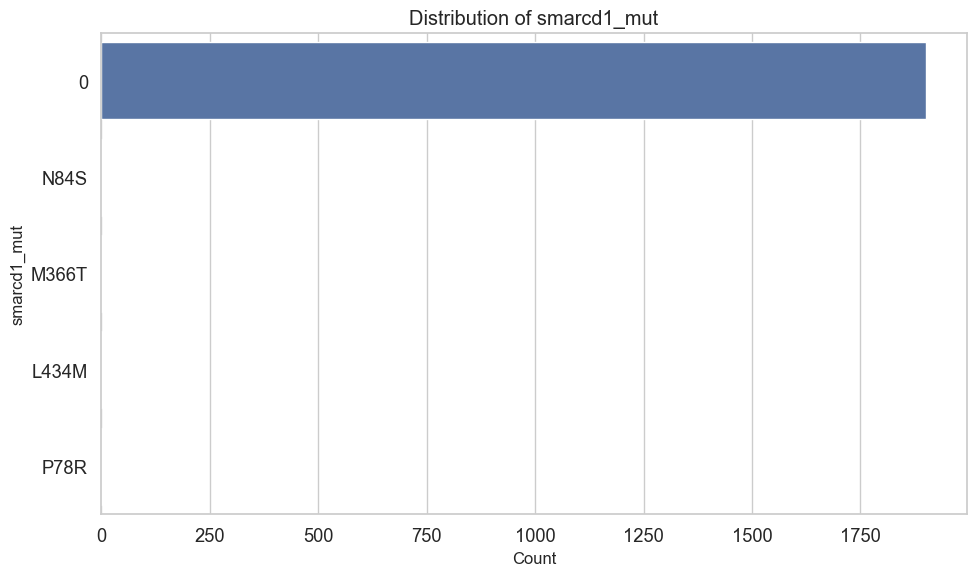


Unique values in 'nras_mut':


,Count,Percentage
nras_mut,,
0,1901,99.84
G12S,1,0.05
T124A,1,0.05
D108N,1,0.05


Successfully saved: categorical_nras_mut.png


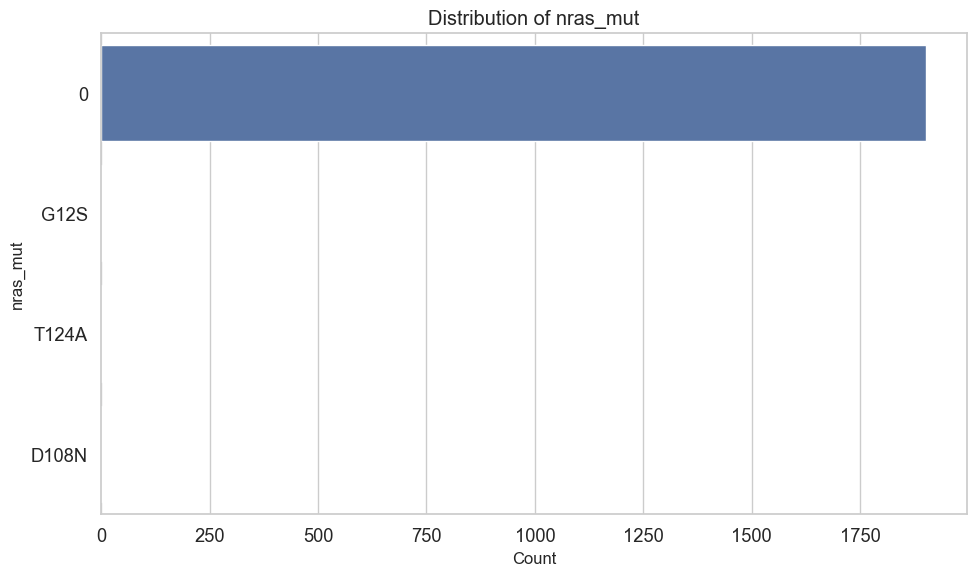


Unique values in 'ndfip1_mut':


,Count,Percentage
ndfip1_mut,,
0,1901,99.84
N68S,1,0.05
X51_splice,1,0.05
A50T,1,0.05


Successfully saved: categorical_ndfip1_mut.png


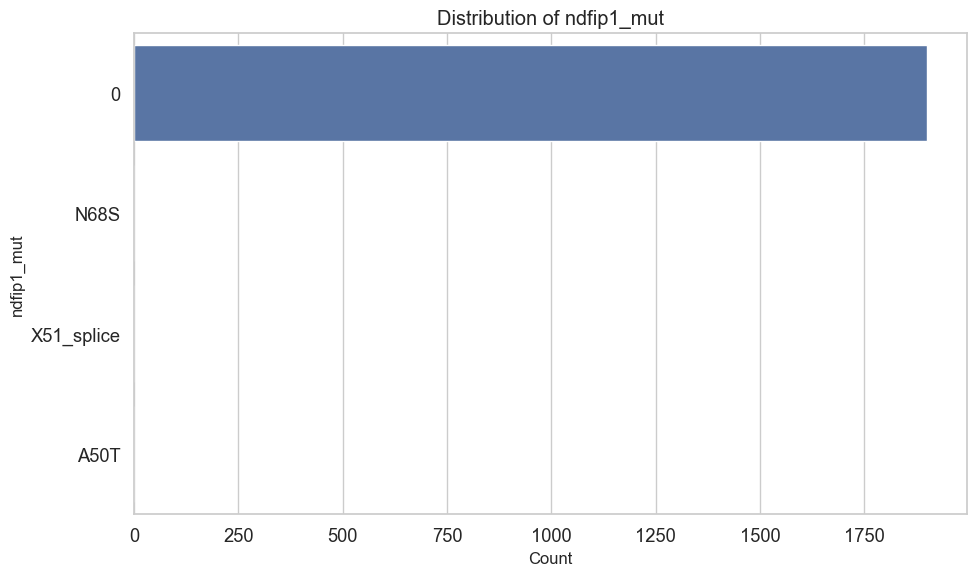


Unique values in 'hras_mut':


,Count,Percentage
hras_mut,,
0,1024,53.78
0,878,46.11
Q61R,1,0.05
N86T,1,0.05


Successfully saved: categorical_hras_mut.png


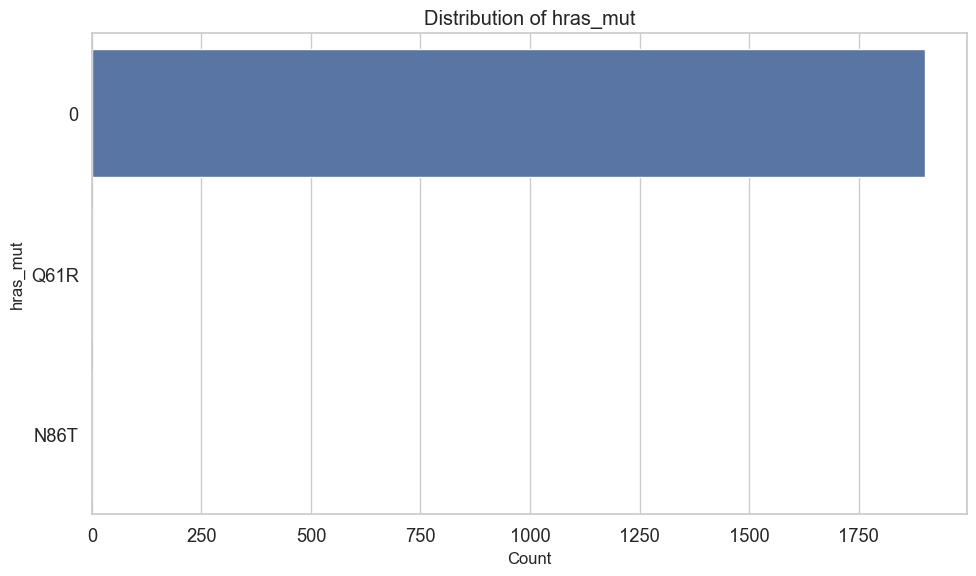


Unique values in 'prps2_mut':


,Count,Percentage
prps2_mut,,
0,1902,99.89
G255R,1,0.05
I159F,1,0.05


Successfully saved: categorical_prps2_mut.png


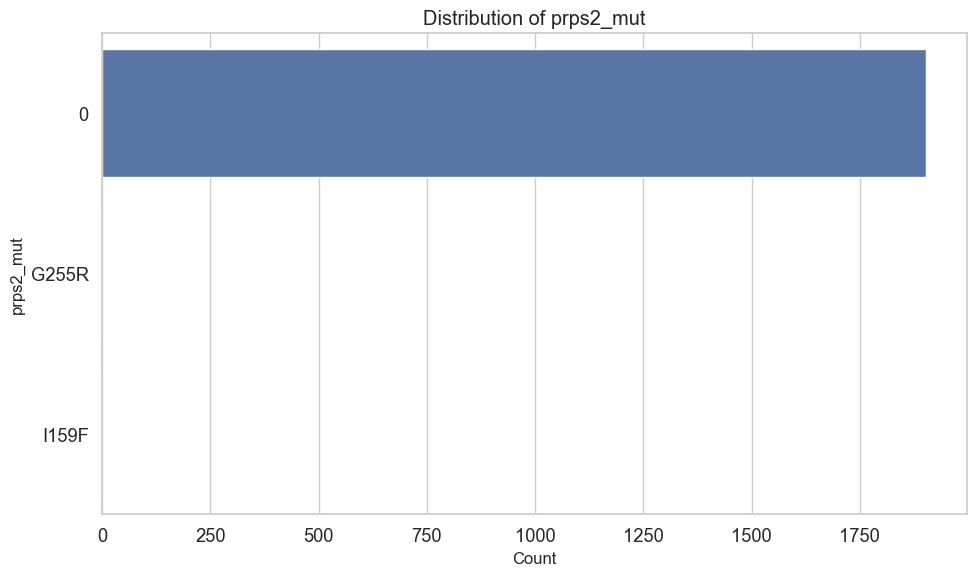


Unique values in 'smarcb1_mut':


,Count,Percentage
smarcb1_mut,,
0,1024,53.78
0,878,46.11
D159N,1,0.05
I28L,1,0.05


Successfully saved: categorical_smarcb1_mut.png


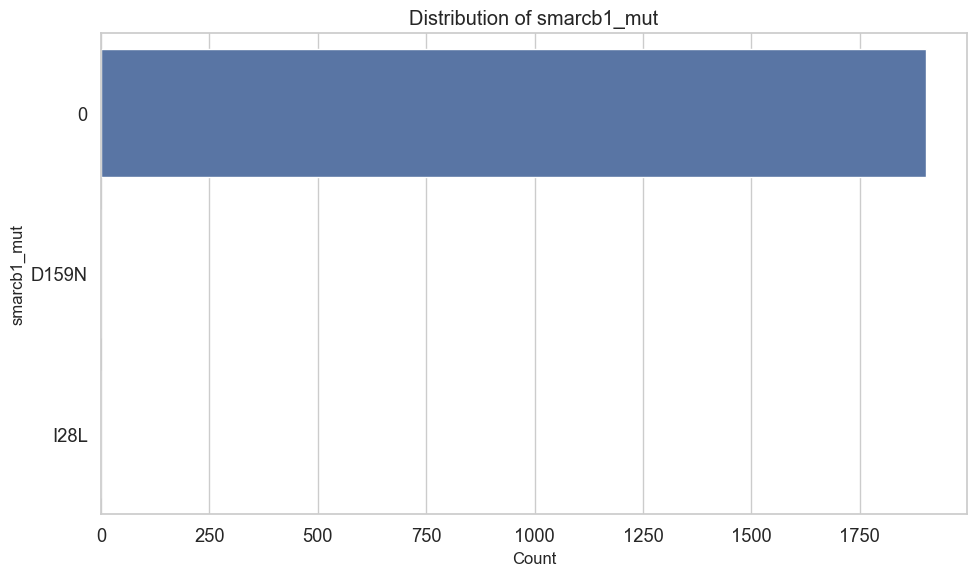


Unique values in 'stmn2_mut':


,Count,Percentage
stmn2_mut,,
0,1902,99.89
N145K,1,0.05
R156H,1,0.05


Successfully saved: categorical_stmn2_mut.png


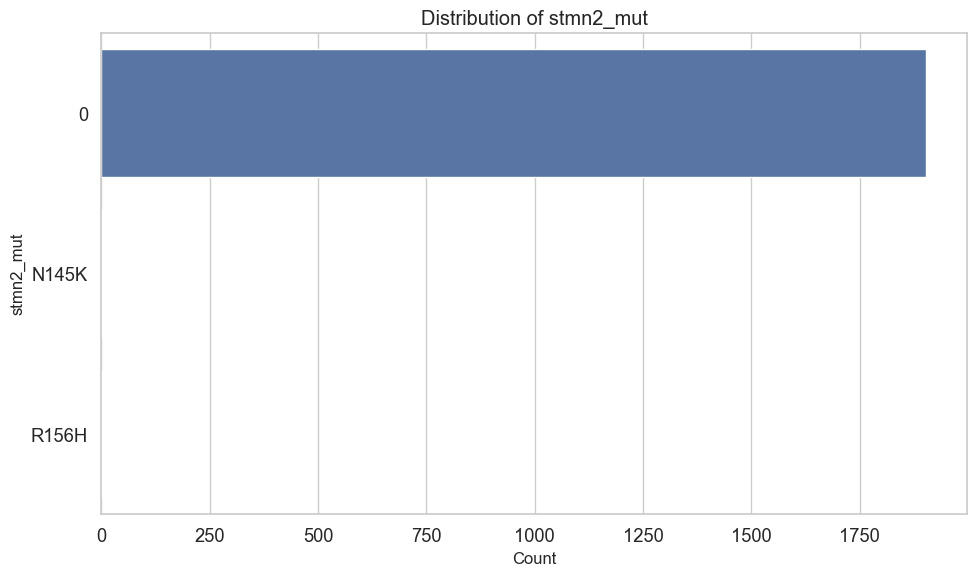


Unique values in 'siah1_mut':


,Count,Percentage
siah1_mut,,
0,1024,53.78
0,879,46.17
T249A,1,0.05


Successfully saved: categorical_siah1_mut.png


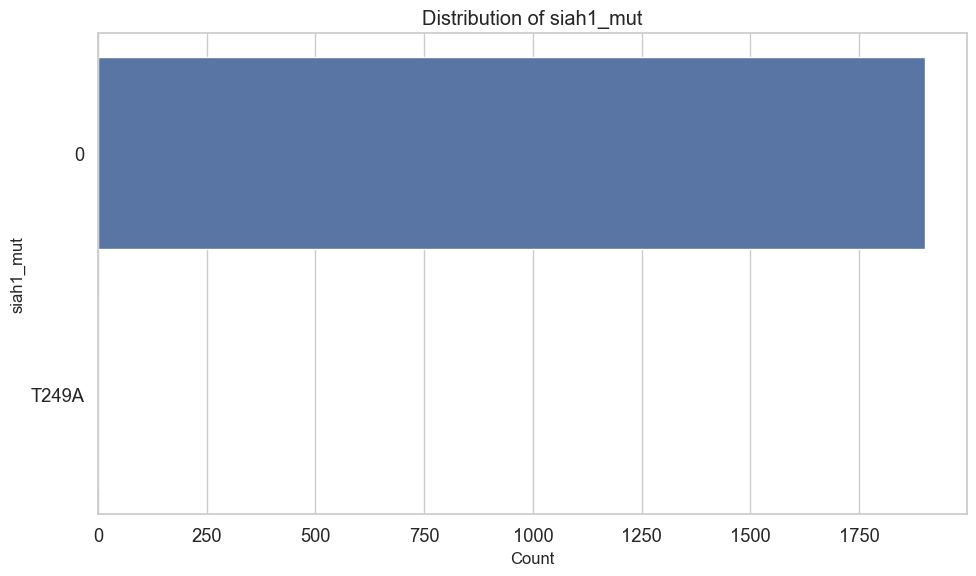

In [10]:
# Analyze the distribution of numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Select a subset of numeric columns for visualization
# If there are many columns, select a sample
if len(numeric_cols) > 10:
    sample_cols = np.random.choice(numeric_cols, size=10, replace=False)
    print(f"\n--- Distribution of Sample Numeric Features (10 of {len(numeric_cols)}) ---")
else:
    sample_cols = numeric_cols
    print(f"\n--- Distribution of All Numeric Features ({len(numeric_cols)}) ---")

# Create histograms for the selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(sample_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

# Create directory and save with error handling
try:
    import os
    os.makedirs('../static/images', exist_ok=True)
    plt.savefig('../static/images/numeric_distributions.png')
    print("Successfully saved: numeric_distributions.png")
except Exception as e:
    print(f"Error saving figure: {e}")

plt.show()

# Analyze categorical columns if present
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    print(f"\n--- Categorical Column Analysis ({len(categorical_cols)} columns) ---")
    
    # For each categorical column, show value counts
    for col in categorical_cols:
        print(f"\nUnique values in '{col}':")
        value_counts = df[col].value_counts()
        total_count = len(df)
        
        # Display top 10 categories with percentages
        display(pd.DataFrame({
            'Count': value_counts[:10],
            'Percentage': (value_counts[:10] / total_count * 100).round(2)
        }))
        
        # Plot distribution if not too many unique values
        if len(value_counts) <= 15:
            plt.figure(figsize=(10, 6))
            sns.countplot(y=col, data=df, order=value_counts.index[:15])
            plt.title(f'Distribution of {col}')
            plt.xlabel('Count')
            plt.tight_layout()
            
            # Create directory and save with error handling
            try:
                import os
                os.makedirs('../static/images', exist_ok=True)
                plt.savefig(f'../static/images/categorical_{col}.png')
                print(f"Successfully saved: categorical_{col}.png")
            except Exception as e:
                print(f"Error saving figure: {e}")
                
            plt.show()


## Gene Expression Overview


--- Gene Expression Overview (Sample of 100 genes) ---
Total number of gene features: 498


,count,mean,std,min,25%,50%,75%,max,missing,missing_pct
age_at_diagnosis,1904.00,61.09,12.98,21.93,51.38,61.77,70.59,96.29,0,0.00
chemotherapy,1904.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00,0,0.00
cohort,1904.00,2.64,1.23,1.00,1.00,3.00,3.00,5.00,0,0.00
neoplasm_histologic_grade,1832.00,2.42,0.65,1.00,2.00,3.00,3.00,3.00,72,3.78
hormone_therapy,1904.00,0.62,0.49,0.00,0.00,1.00,1.00,1.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...
kdm5a,1904.00,0.00,1.00,-4.38,-0.64,-0.03,0.56,5.71,0,0.00
lfng,1904.00,0.00,1.00,-2.97,-0.69,-0.02,0.67,3.11,0,0.00
maml1,1904.00,0.00,1.00,-3.81,-0.63,-0.03,0.62,4.41,0,0.00
maml2,1904.00,-0.00,1.00,-2.41,-0.65,-0.12,0.46,7.69,0,0.00


Successfully saved: gene_expression_boxplot.png


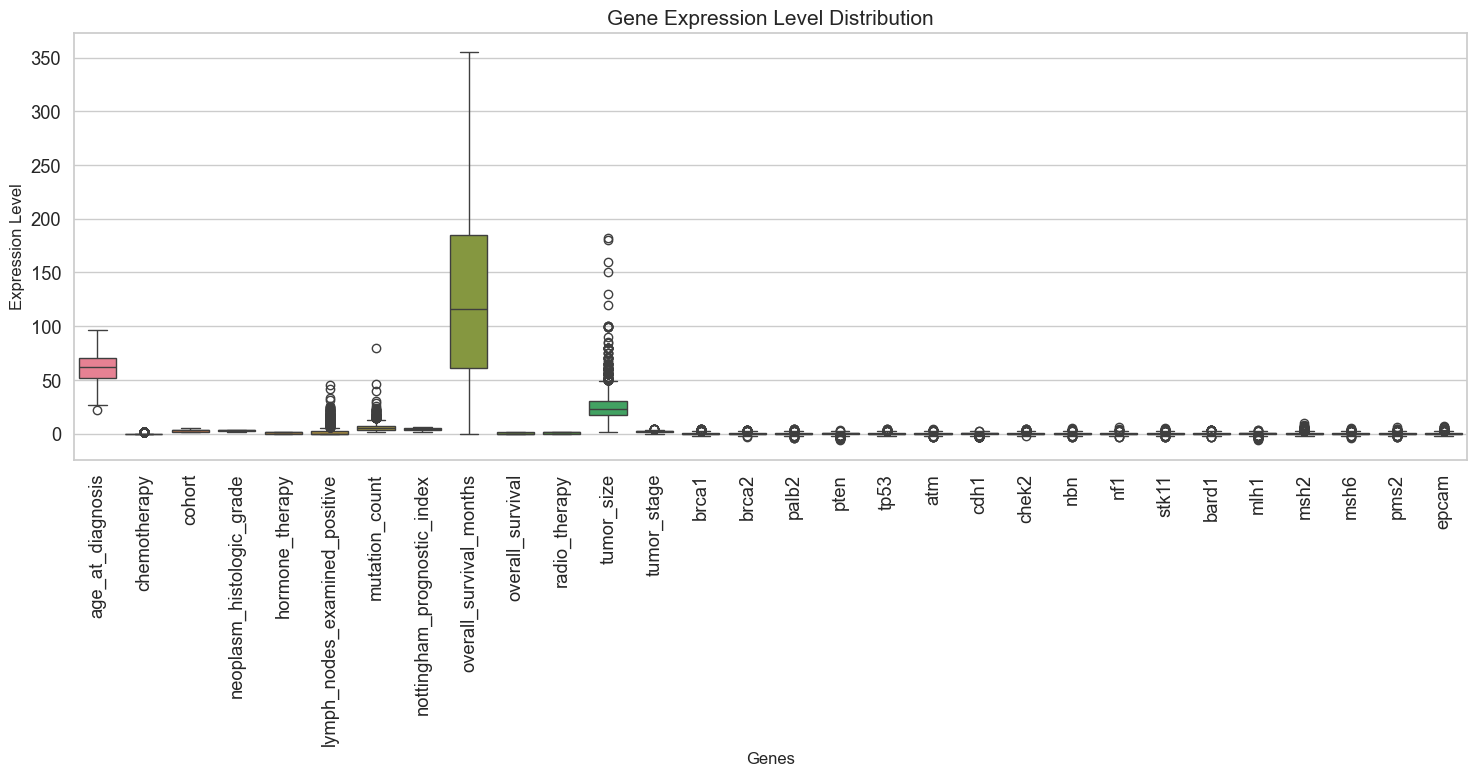

In [11]:
# Identify gene expression columns (exclude ID and metadata columns)
# Assuming gene expression columns are numeric and not ID columns
gene_cols = [col for col in numeric_cols if col not in id_columns]

# If there are too many genes, analyze just a sample
gene_sample = gene_cols[:100] if len(gene_cols) > 100 else gene_cols

print(f"\n--- Gene Expression Overview (Sample of {len(gene_sample)} genes) ---")
print(f"Total number of gene features: {len(gene_cols)}")

# Basic statistics for gene expression
gene_stats = df[gene_sample].describe().T
gene_stats['missing'] = df[gene_sample].isnull().sum()
gene_stats['missing_pct'] = (df[gene_sample].isnull().sum() / len(df) * 100).round(2)

display(gene_stats)

# Visualization of gene expression distributions
plt.figure(figsize=(15, 8))
plt.title('Gene Expression Level Distribution', fontsize=15)

# Create boxplot for the first 30 genes to show expression variability
genes_to_plot = gene_sample[:30]
sns.boxplot(data=df[genes_to_plot])
plt.xticks(rotation=90)
plt.xlabel('Genes')
plt.ylabel('Expression Level')
plt.tight_layout()

# Create directory and save with error handling
try:
    import os
    os.makedirs('../static/images', exist_ok=True)
    plt.savefig('../static/images/gene_expression_boxplot.png')
    print("Successfully saved: gene_expression_boxplot.png")
except Exception as e:
    print(f"Error saving figure: {e}")

plt.show()

## Correlation Analysis


--- Correlation Analysis (Sample of Genes) ---
Analyzing correlations between 20 gene features
Successfully saved: gene_correlation_heatmap.png


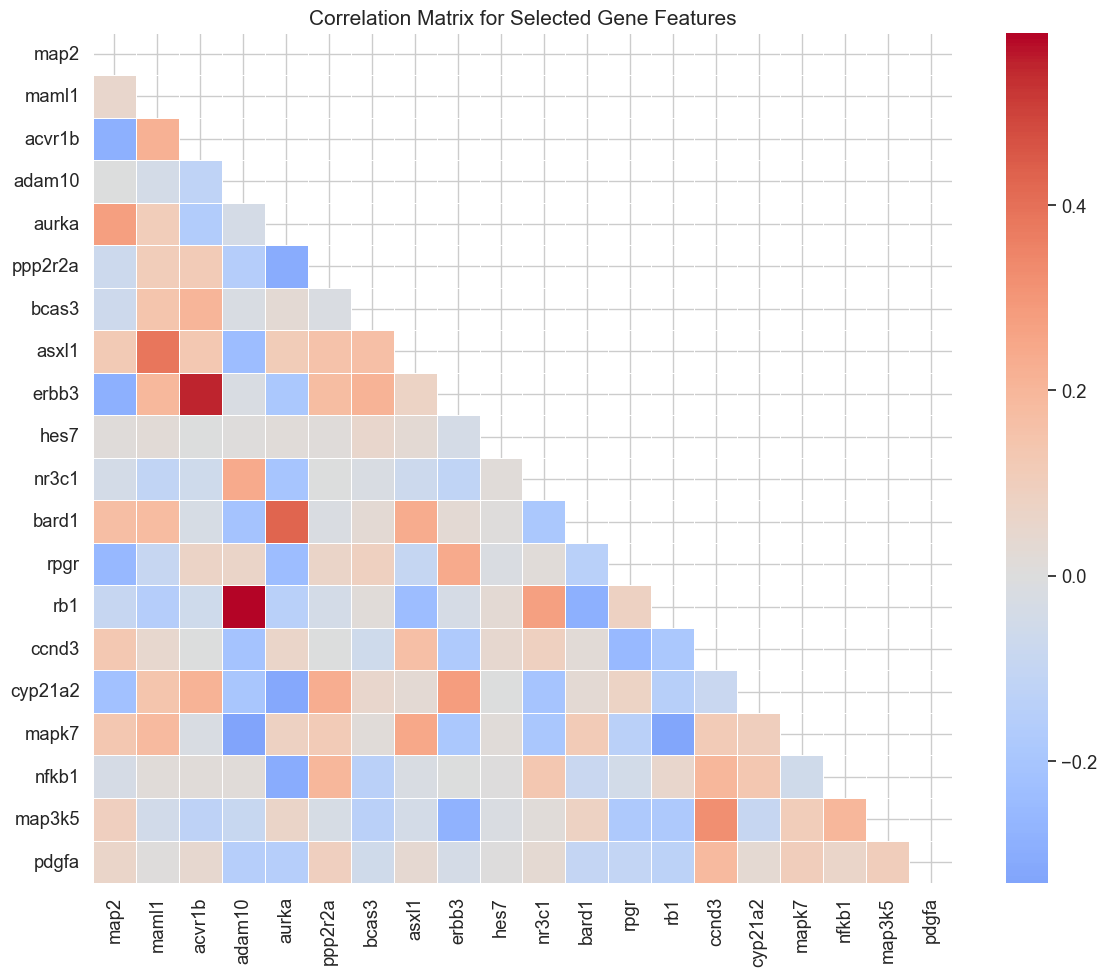


Top 10 highest gene correlations:


adam10  rb1      0.59
rb1     adam10   0.59
erbb3   acvr1b   0.55
acvr1b  erbb3    0.55
bard1   aurka    0.43
aurka   bard1    0.43
asxl1   maml1    0.39
maml1   asxl1    0.39
map3k5  ccnd3    0.32
ccnd3   map3k5   0.32
dtype: float64


Top 10 lowest gene correlations:


ppp2r2a  aurka     -0.30
aurka    ppp2r2a   -0.30
         nfkb1     -0.30
nfkb1    aurka     -0.30
cyp21a2  aurka     -0.31
aurka    cyp21a2   -0.31
mapk7    rb1       -0.33
rb1      mapk7     -0.33
adam10   mapk7     -0.33
mapk7    adam10    -0.33
dtype: float64

In [12]:
# Select a subset of genes for correlation analysis
# Using too many features in a correlation matrix can make it unreadable
corr_sample = np.random.choice(gene_cols, size=min(20, len(gene_cols)), replace=False)

print("\n--- Correlation Analysis (Sample of Genes) ---")
print(f"Analyzing correlations between {len(corr_sample)} gene features")

# Calculate correlation matrix
correlation = df[corr_sample].corr()

# Create heatmap of correlations
plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, 
            cmap='coolwarm', 
            annot=False,
            mask=mask,
            center=0,
            linewidths=0.5)
plt.title('Correlation Matrix for Selected Gene Features', fontsize=15)
plt.tight_layout()

# Create directory and save with error handling
try:
    import os
    os.makedirs('../static/images', exist_ok=True)
    plt.savefig('../static/images/gene_correlation_heatmap.png')
    print("Successfully saved: gene_correlation_heatmap.png")
except Exception as e:
    print(f"Error saving figure: {e}")

plt.show()

# Find the most highly correlated gene pairs
corr_unstack = correlation.unstack()
corr_unstack = corr_unstack.sort_values(ascending=False)

# Remove self-correlations (which are always 1.0)
high_corr = corr_unstack[corr_unstack < 1.0]

print("\nTop 10 highest gene correlations:")
display(high_corr.head(10))

print("\nTop 10 lowest gene correlations:")
display(high_corr.tail(10))

## Metadata Analysis And Dataset Summary

In [13]:
# Create a summary of the dataset
print("\n--- Dataset Summary ---")
print(f"Total number of samples: {rows}")
print(f"Total number of features: {cols}")
print(f"Number of potential gene expression features: {len(gene_cols)}")

# Check for potential metadata columns (non-numeric columns that might contain relevant info)
metadata_cols = [col for col in df.columns if col not in numeric_cols and col not in id_columns]
print(f"Number of metadata columns: {len(metadata_cols)}")
if metadata_cols:
    print(f"Metadata columns: {metadata_cols}")

# Create dataset summary to be saved as a reference
summary_dict = {
    'Dataset': 'METABRIC RNA and Mutation Data',
    'Rows': rows,
    'Columns': cols,
    'ID Columns': id_columns,
    'Missing Value Columns': len(missing_cols),
    'Duplicate Rows': duplicates,
    'Gene Expression Features': len(gene_cols),
    'Execution Date': datetime.now().strftime('%Y-%m-%d')
}

# Convert to DataFrame for nicer display
summary_df = pd.DataFrame([summary_dict])
display(summary_df)

# Save summary to CSV for future reference
summary_df.to_csv('../data/processed/dataset_summary.csv', index=False)
print("Dataset summary saved to '../data/processed/dataset_summary.csv'")


--- Dataset Summary ---
Total number of samples: 1904
Total number of features: 693
Number of potential gene expression features: 498
Number of metadata columns: 186
Metadata columns: ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'pam50_+_claudin-low_subtype', 'er_status_measured_by_ihc', 'er_status', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'oncotree_code', 'pr_status', '3-gene_classifier_subtype', 'death_from_cancer', 'pik3ca_mut', 'tp53_mut', 'muc16_mut', 'ahnak2_mut', 'kmt2c_mut', 'syne1_mut', 'gata3_mut', 'map3k1_mut', 'ahnak_mut', 'dnah11_mut', 'cdh1_mut', 'dnah2_mut', 'kmt2d_mut', 'ush2a_mut', 'ryr2_mut', 'dnah5_mut', 'herc2_mut', 'pde4dip_mut', 'akap9_mut', 'tg_mut', 'birc6_mut', 'utrn_mut', 'tbx3_mut', 'col6a3_mut', 'lama2_mut', 'notch1_mut', 'cbfb_mut', 'ncor2_mut', 'col12a1_mut', 'col22a1_mut', 'pten_mut', 'akt1_mut', 'at

,Dataset,Rows,Columns,ID Columns,Missing Value Columns,Duplicate Rows,Gene Expression Features,Execution Date
0,METABRIC RNA and Mutation Data,1904,693,"[patient_id, arid1a, arid1b, arid2, arid5b, ar...",13,0,498,2025-03-16


Dataset summary saved to '../data/processed/dataset_summary.csv'
